<a href="https://colab.research.google.com/github/Janashruthi-B/yolov8_brain_tumor/blob/main/yolov8_with_acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon May  6 02:08:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="t8N4QsdHyhtAhhUcv03S")
project = rf.workspace("kidney-d2eqe").project("btd02")
version = project.version(3)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to btd02-3 in yolov8:: 100%|██████████| 13206/13206 [00:01<00:00, 6767.44it/s]


In [ ]:
%cat {dataset.location}/data.yaml

names:
- glioma
- meningioma
- no_tumor
- pituitary
nc: 4
roboflow:
  license: CC BY 4.0
  project: btd02
  url: https://universe.roboflow.com/kidney-d2eqe/btd02/dataset/3
  version: 3
  workspace: kidney-d2eqe
test: test/images
train: train/images
val: valid/images


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=800 plots=True


/content
New https://pypi.org/project/ultralytics/8.2.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/btd02-3/data.yaml, epochs=30, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=Fa

In [ ]:
print(dataset.location)


/content/btd02-3


In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/btd02-3/valid/labels.cache... 659 images, 0 backgrounds, 0 corrupt: 100% 659/659 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 673. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 42/42 [00:14<00:00,  2.82it/s]
                   all        659        673      0.912       0.87      0

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 420, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 97, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 149, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 628, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 567, in torch_safe_load
    return torch.load(file, map_location='cpu'), file  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 998, in load
    with _open_file_like(f, 'rb') 

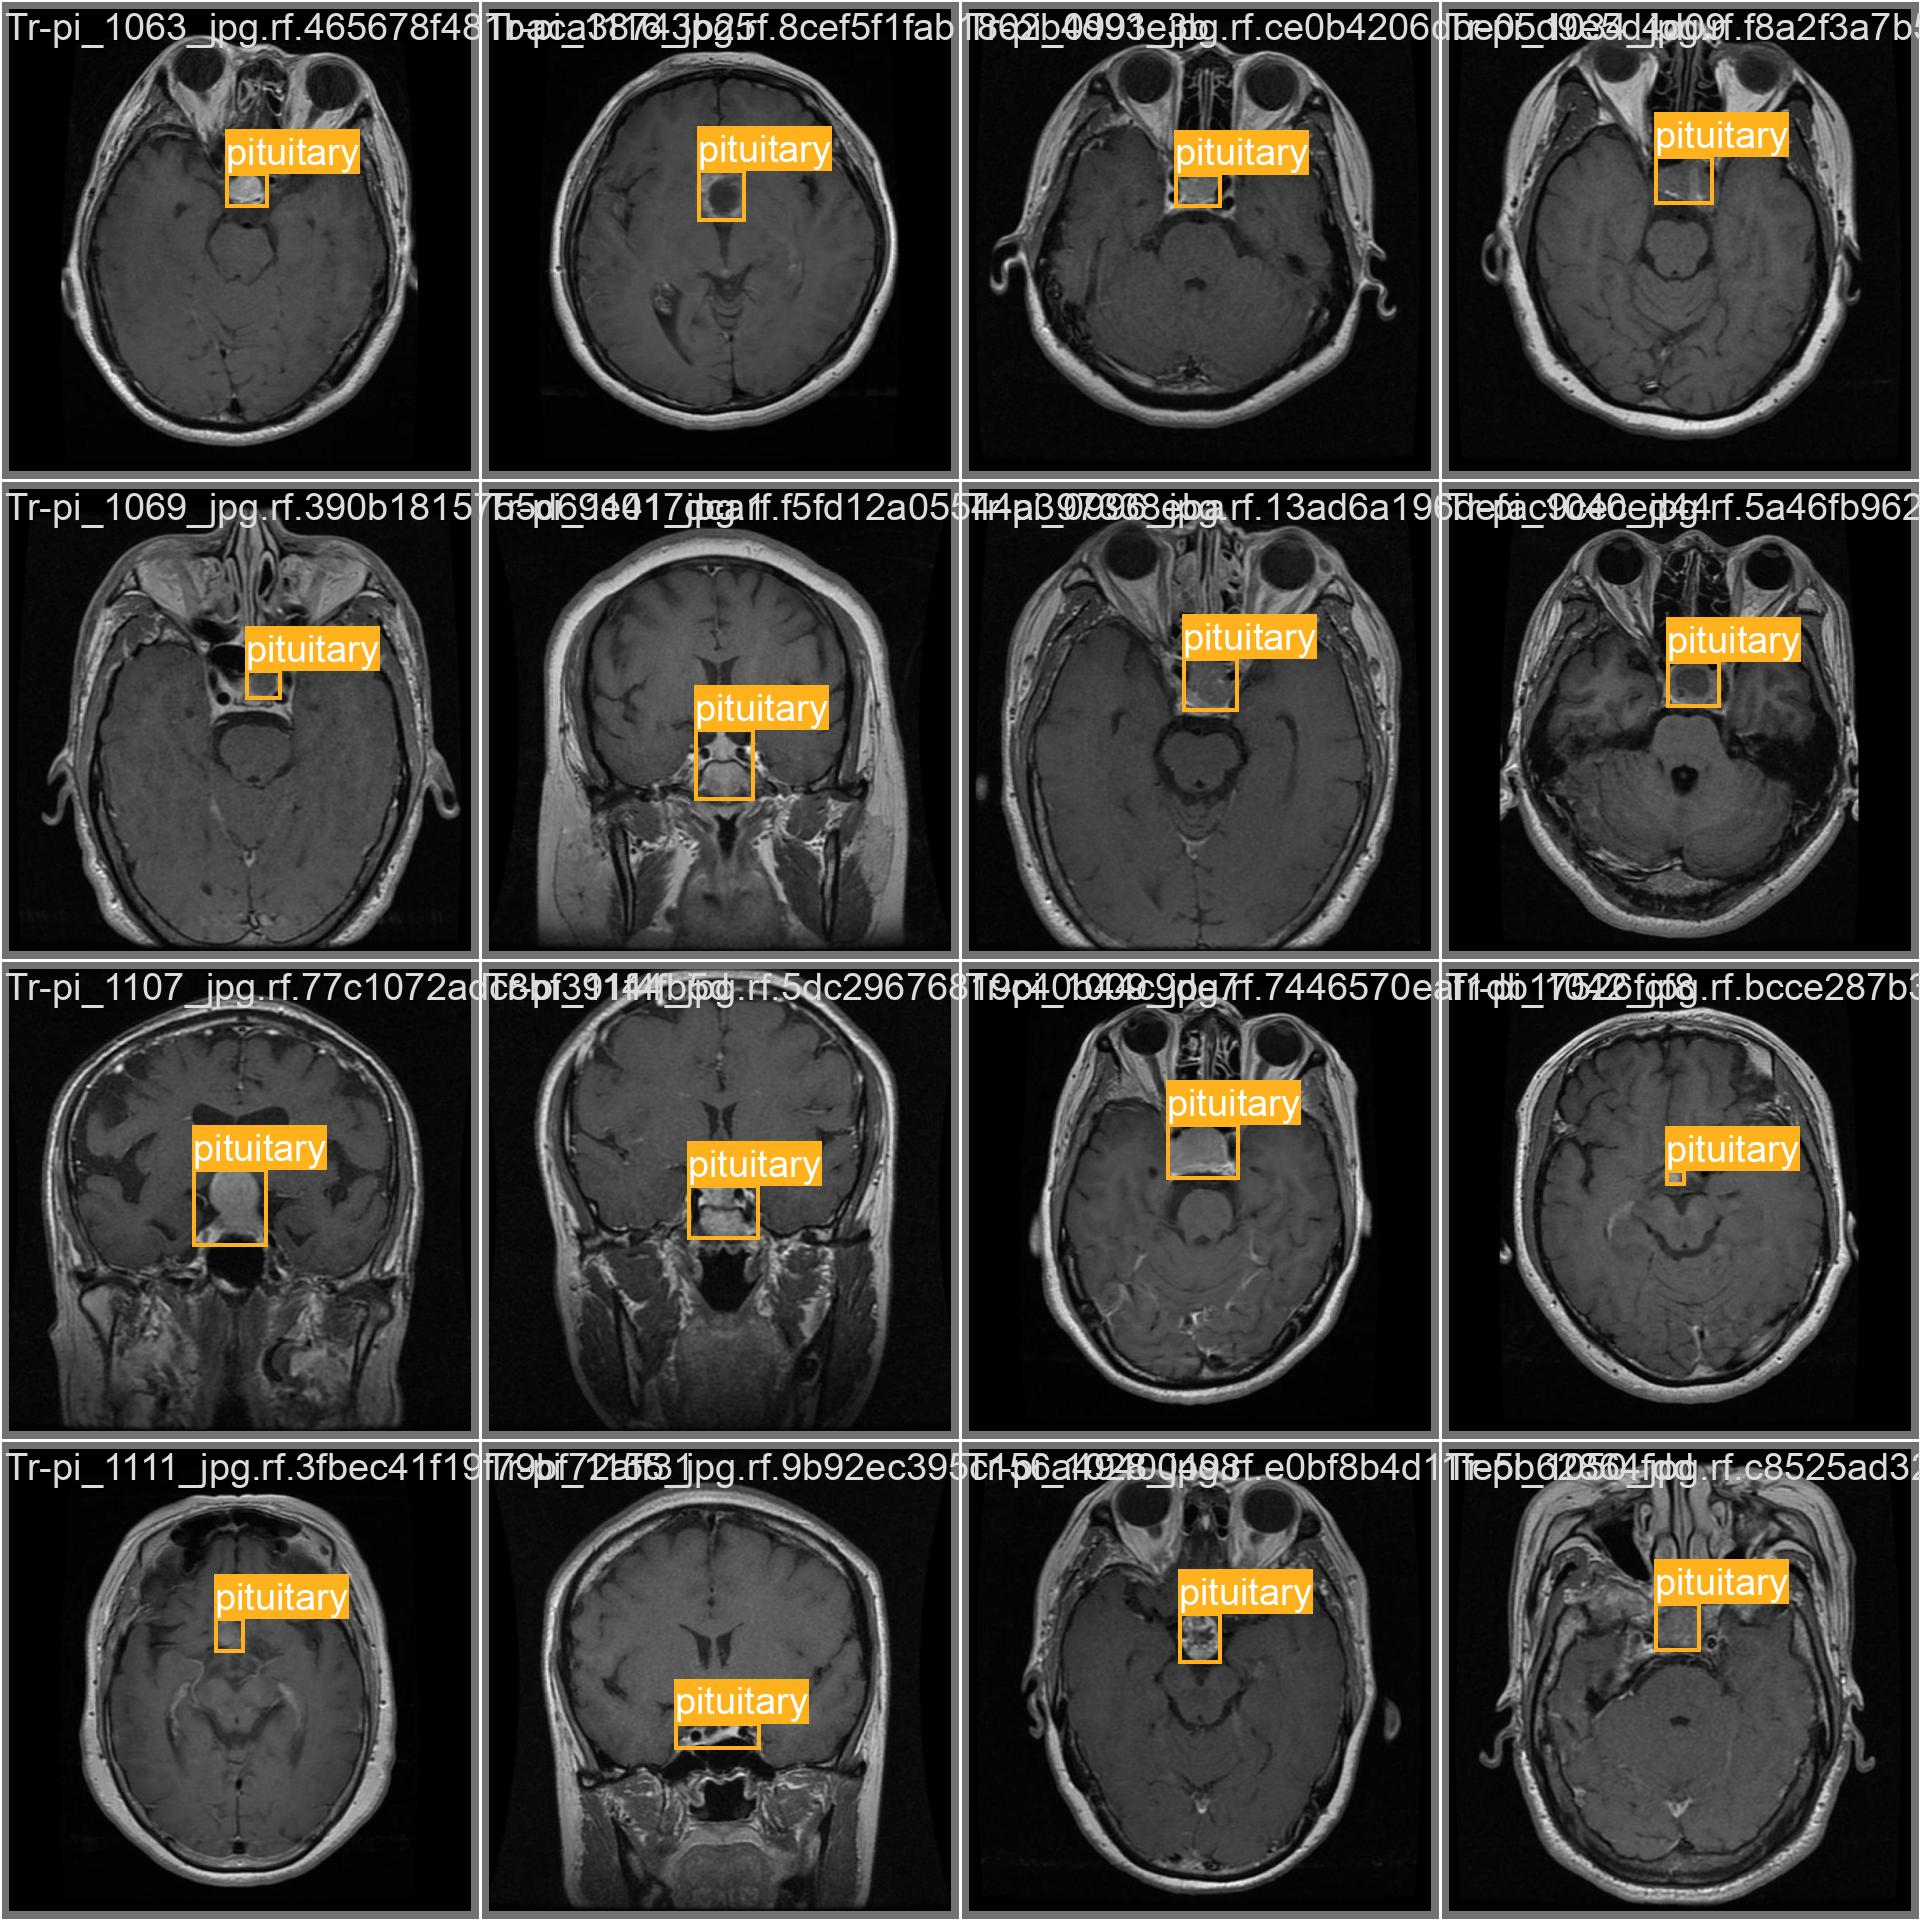

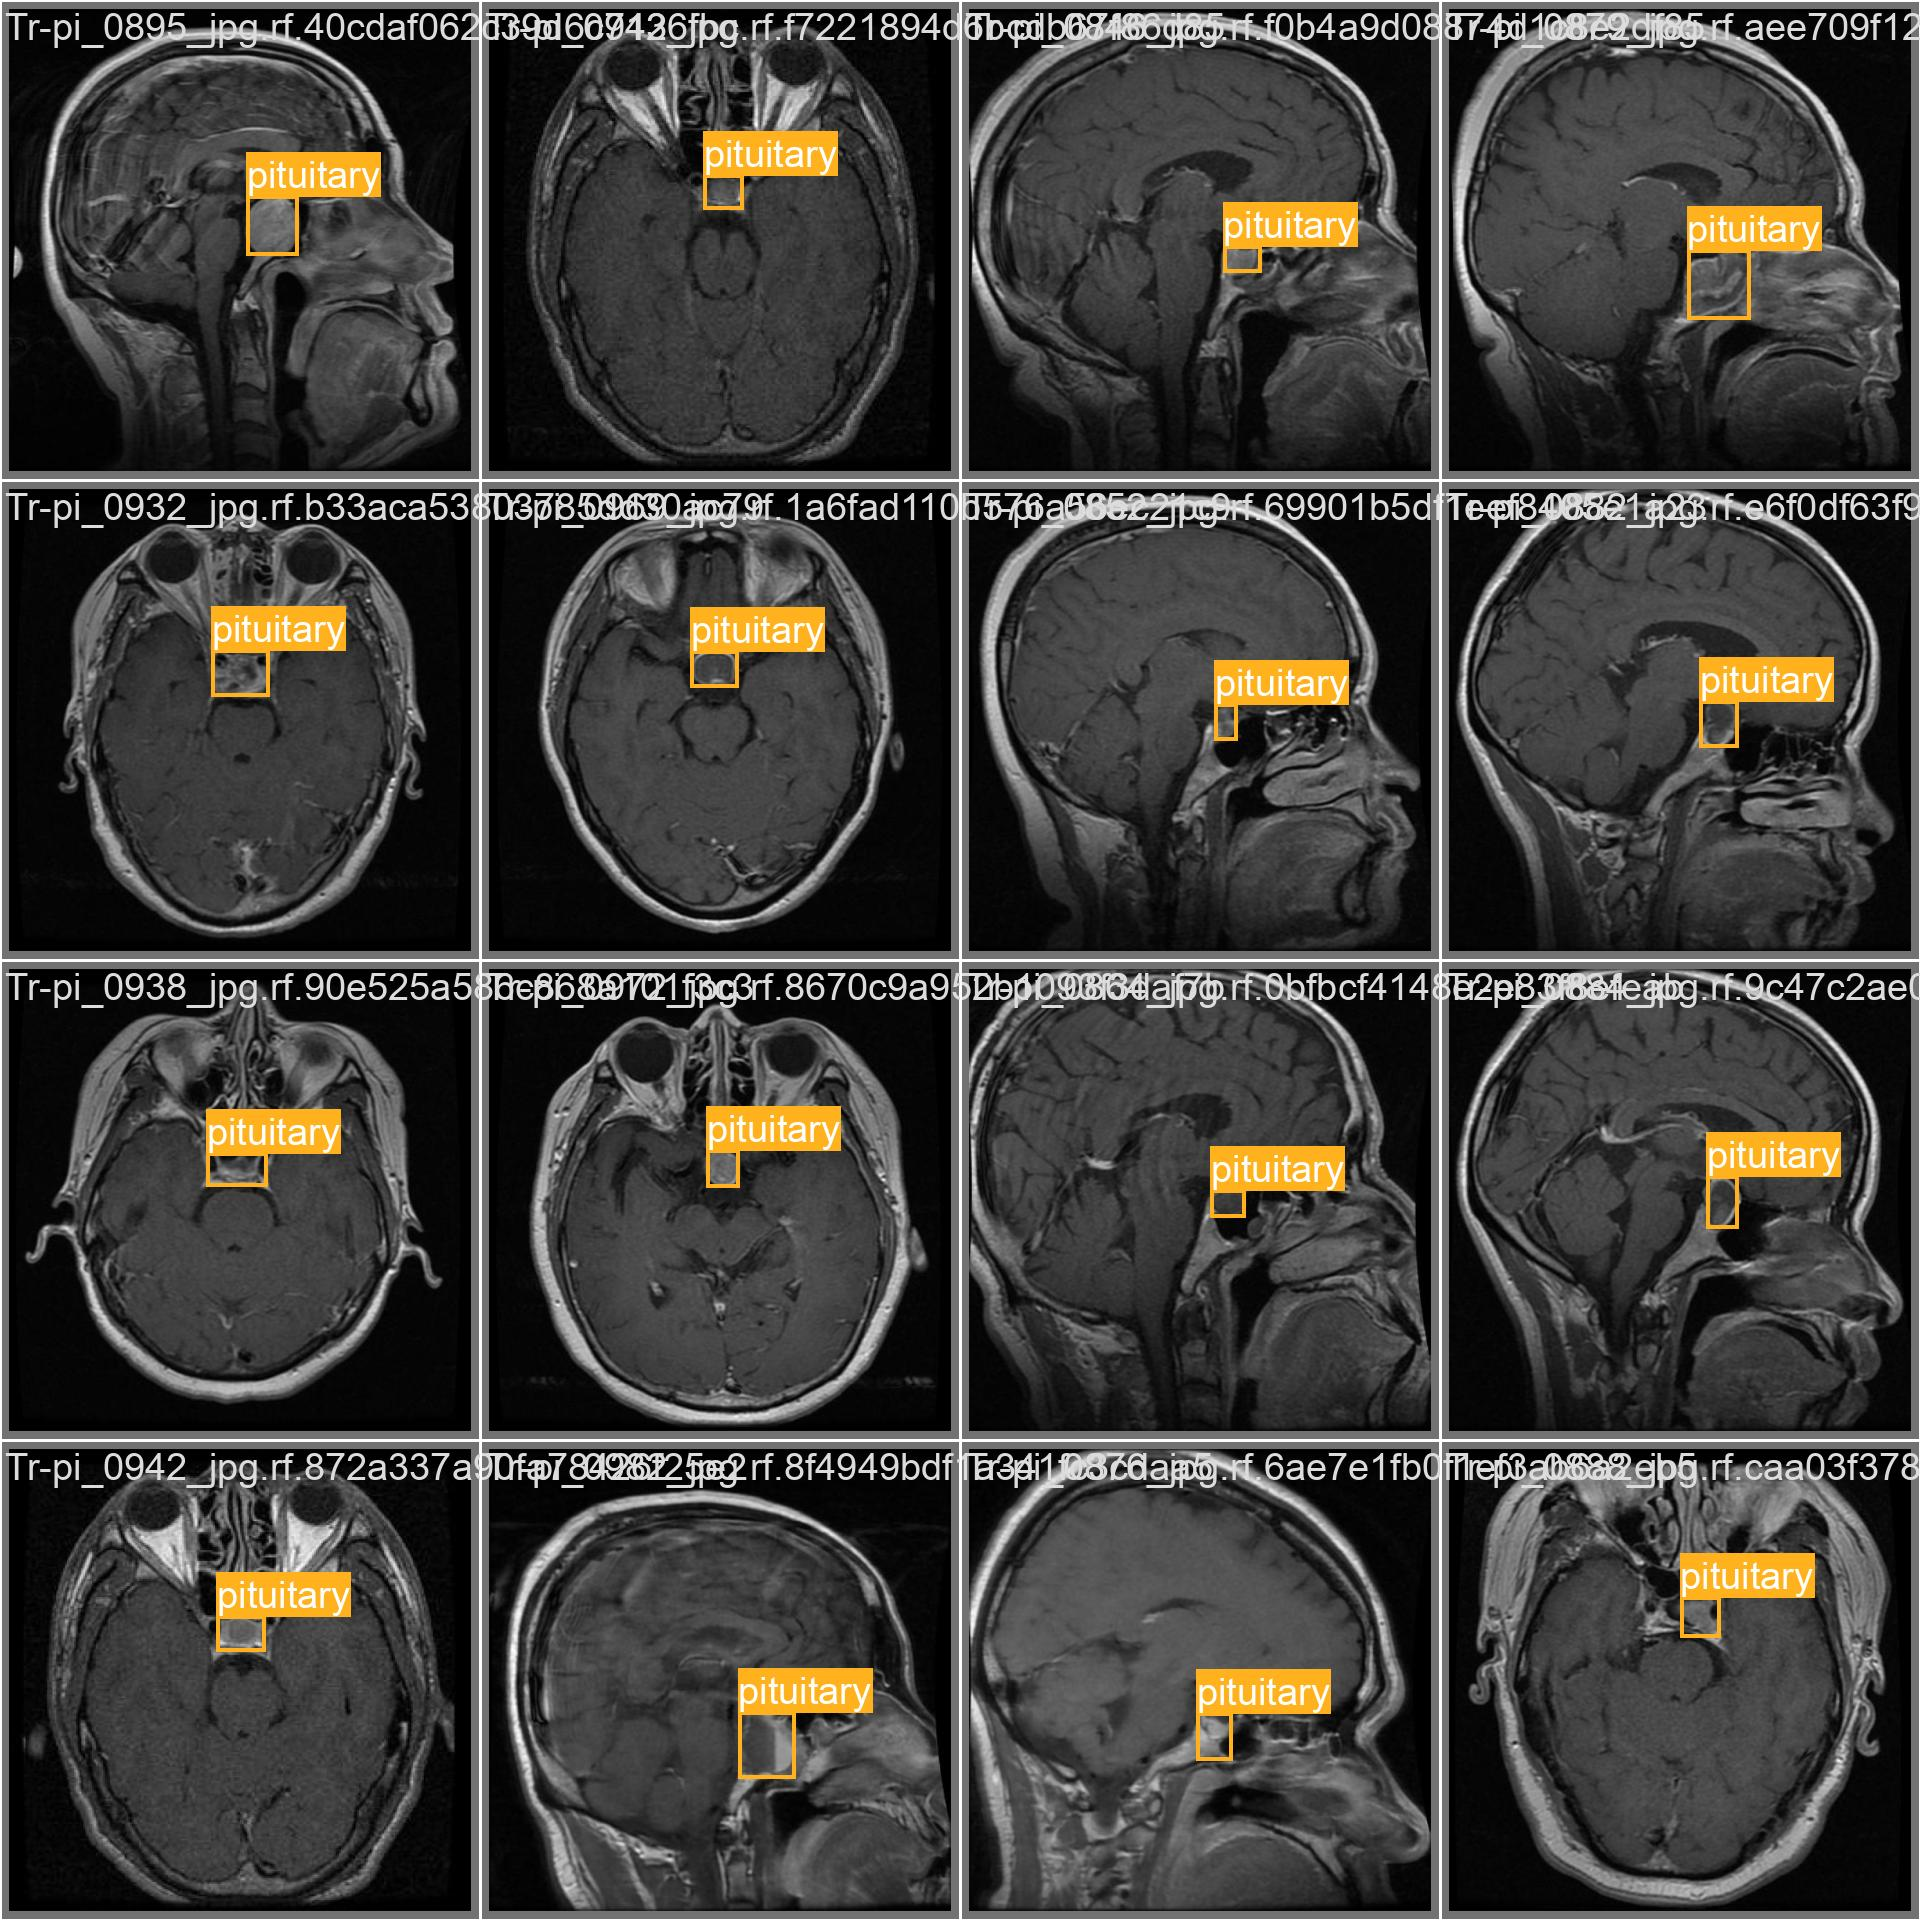

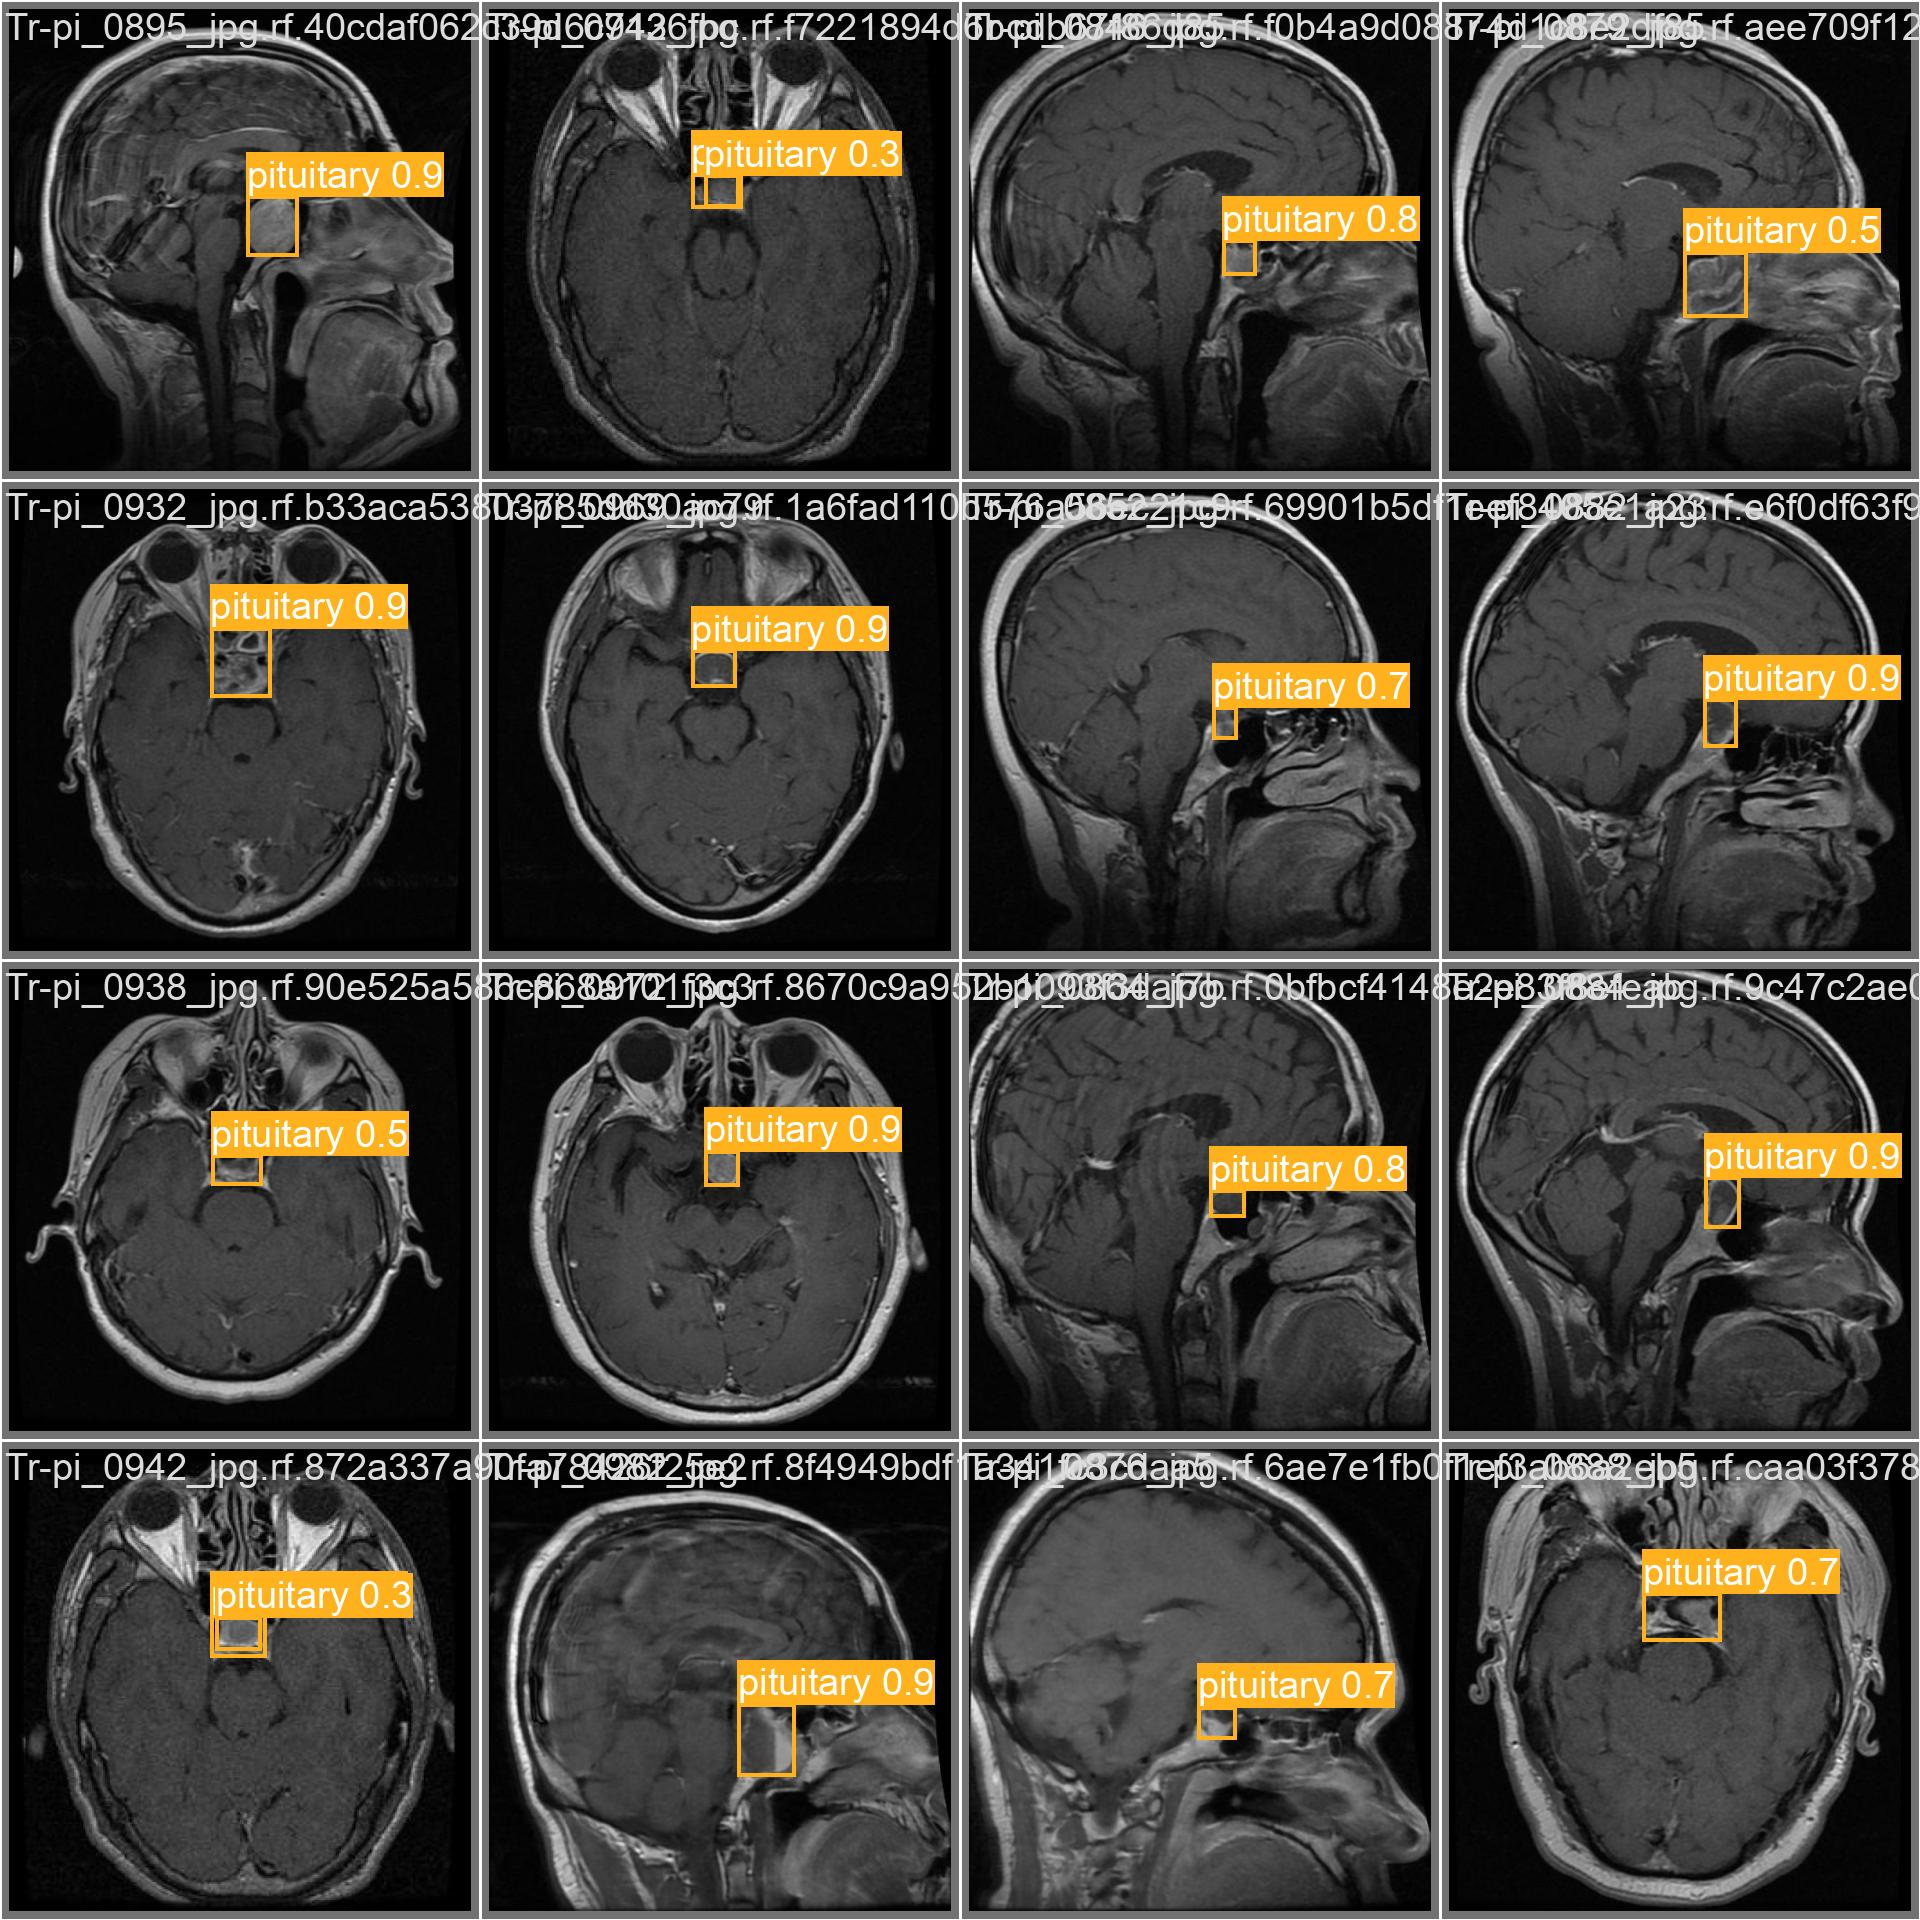

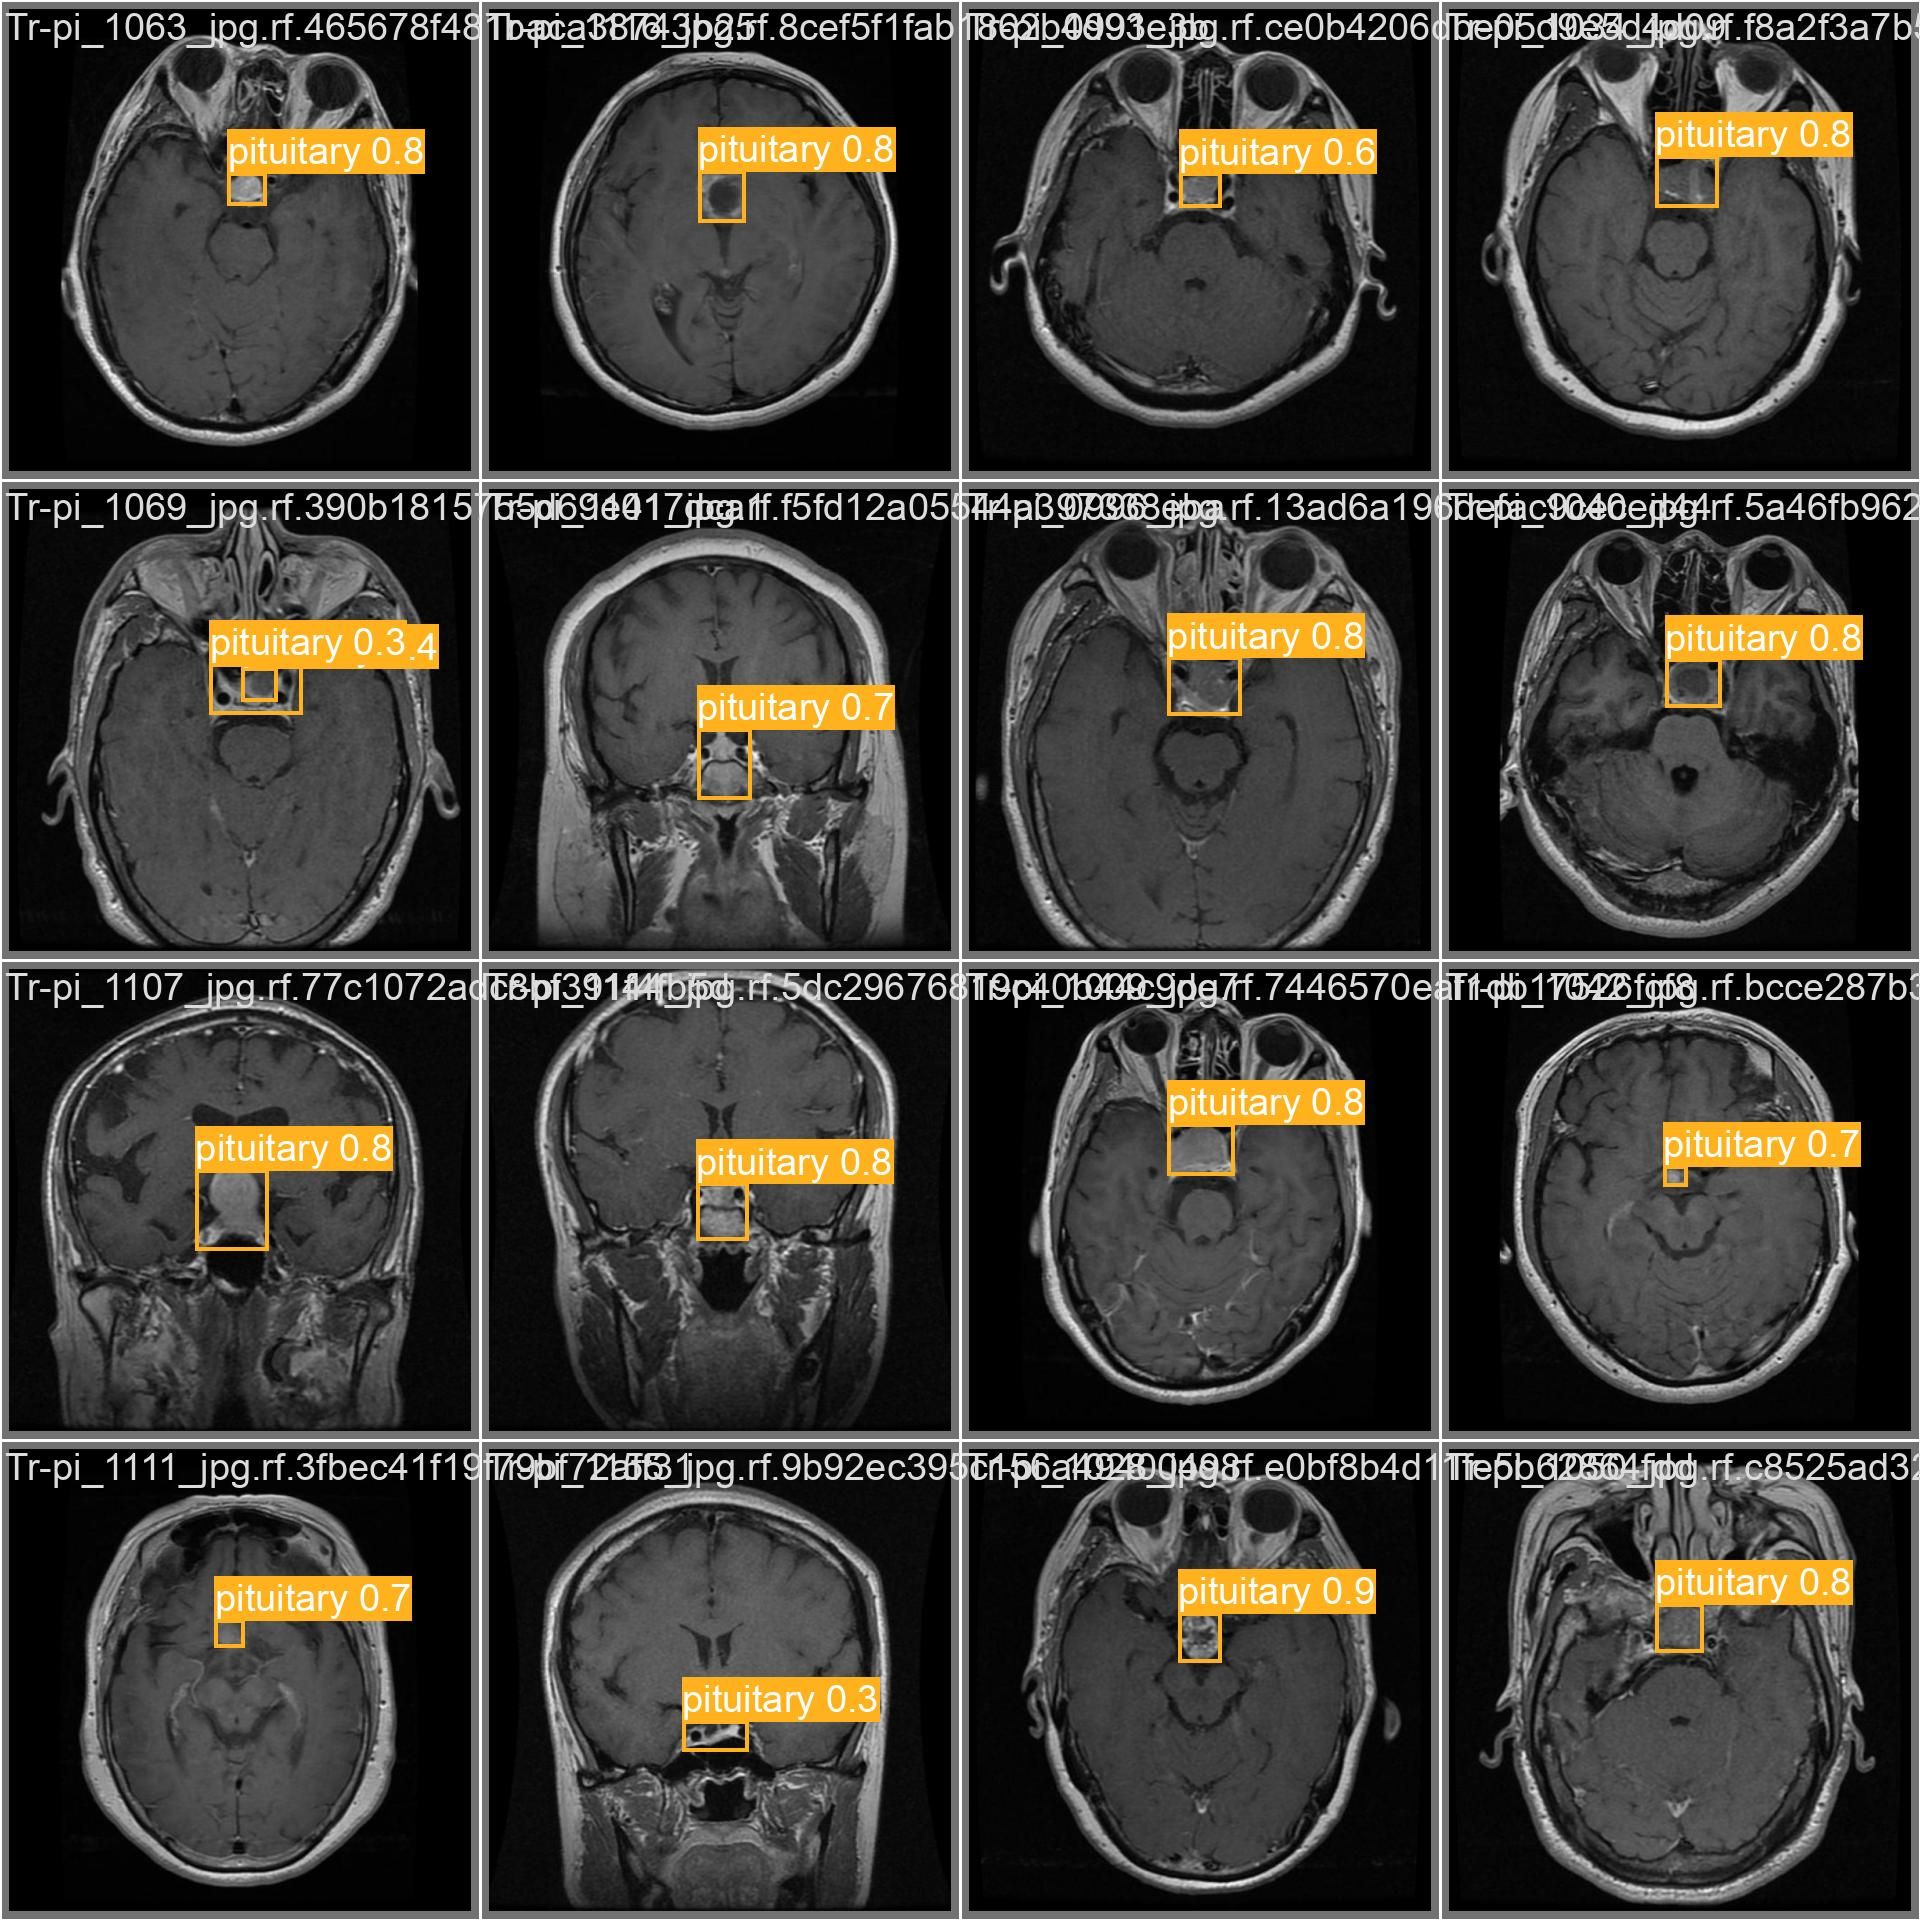

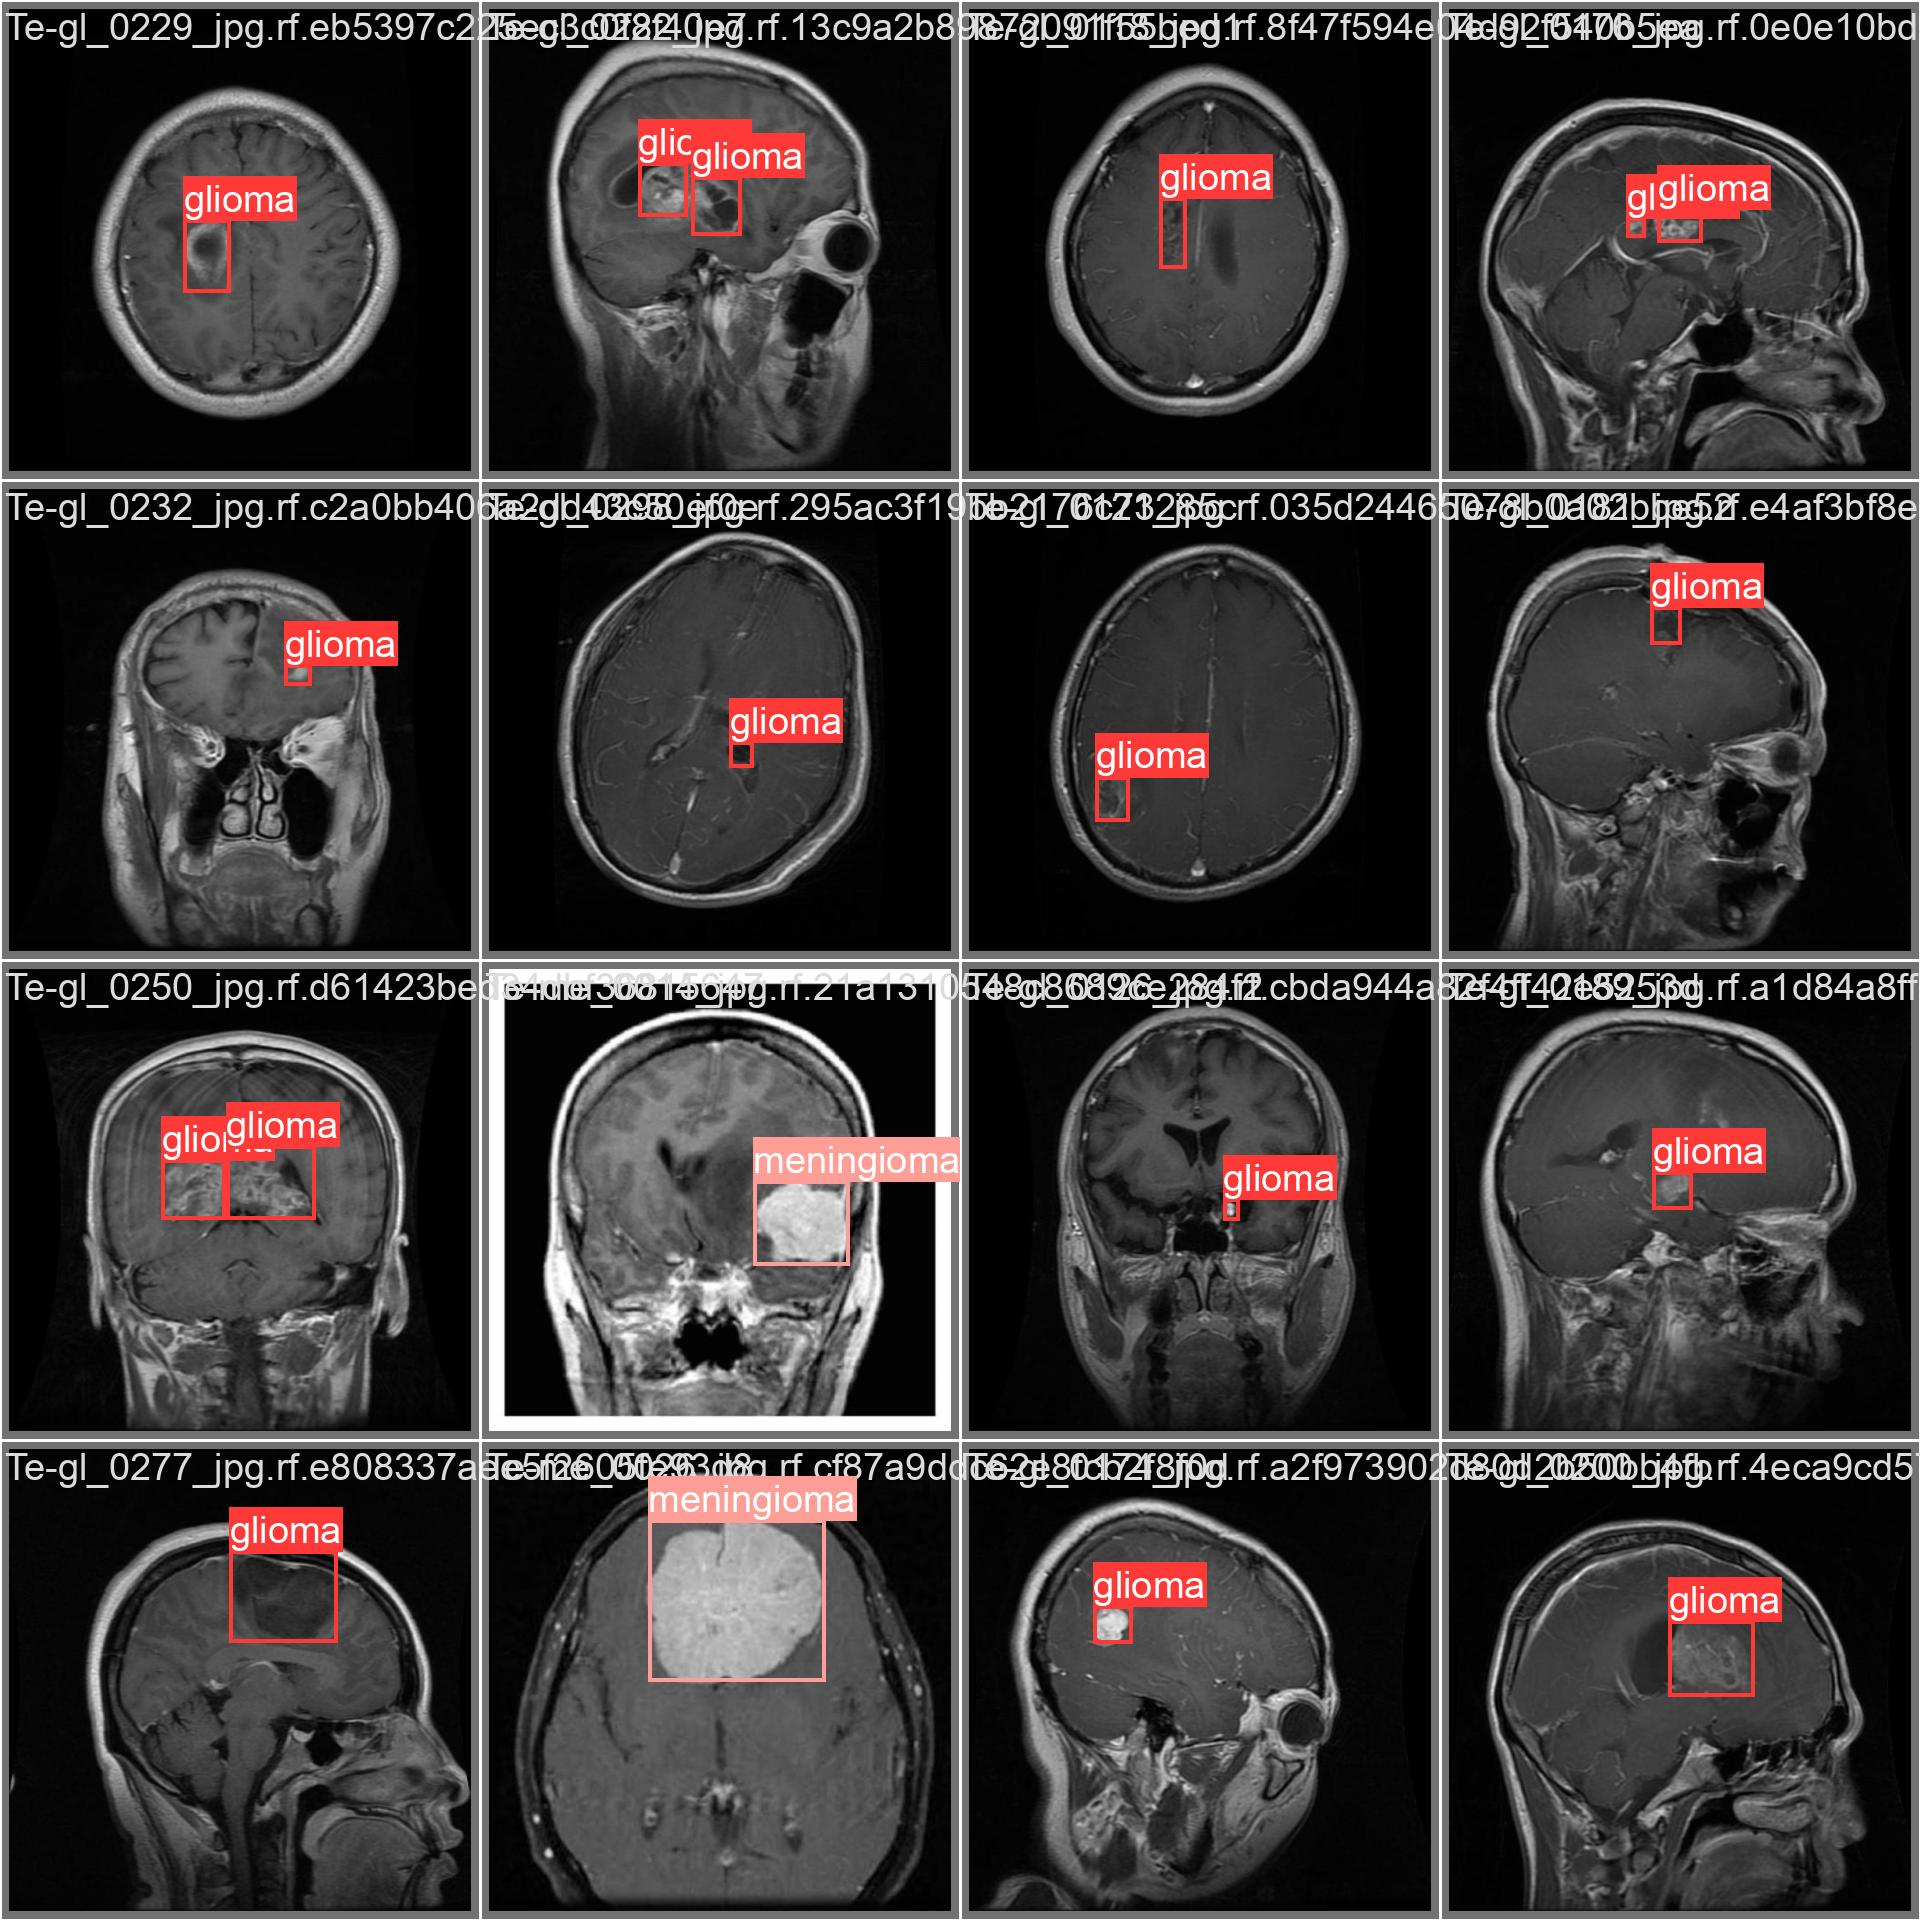

/n
/n
/n
/n
/n


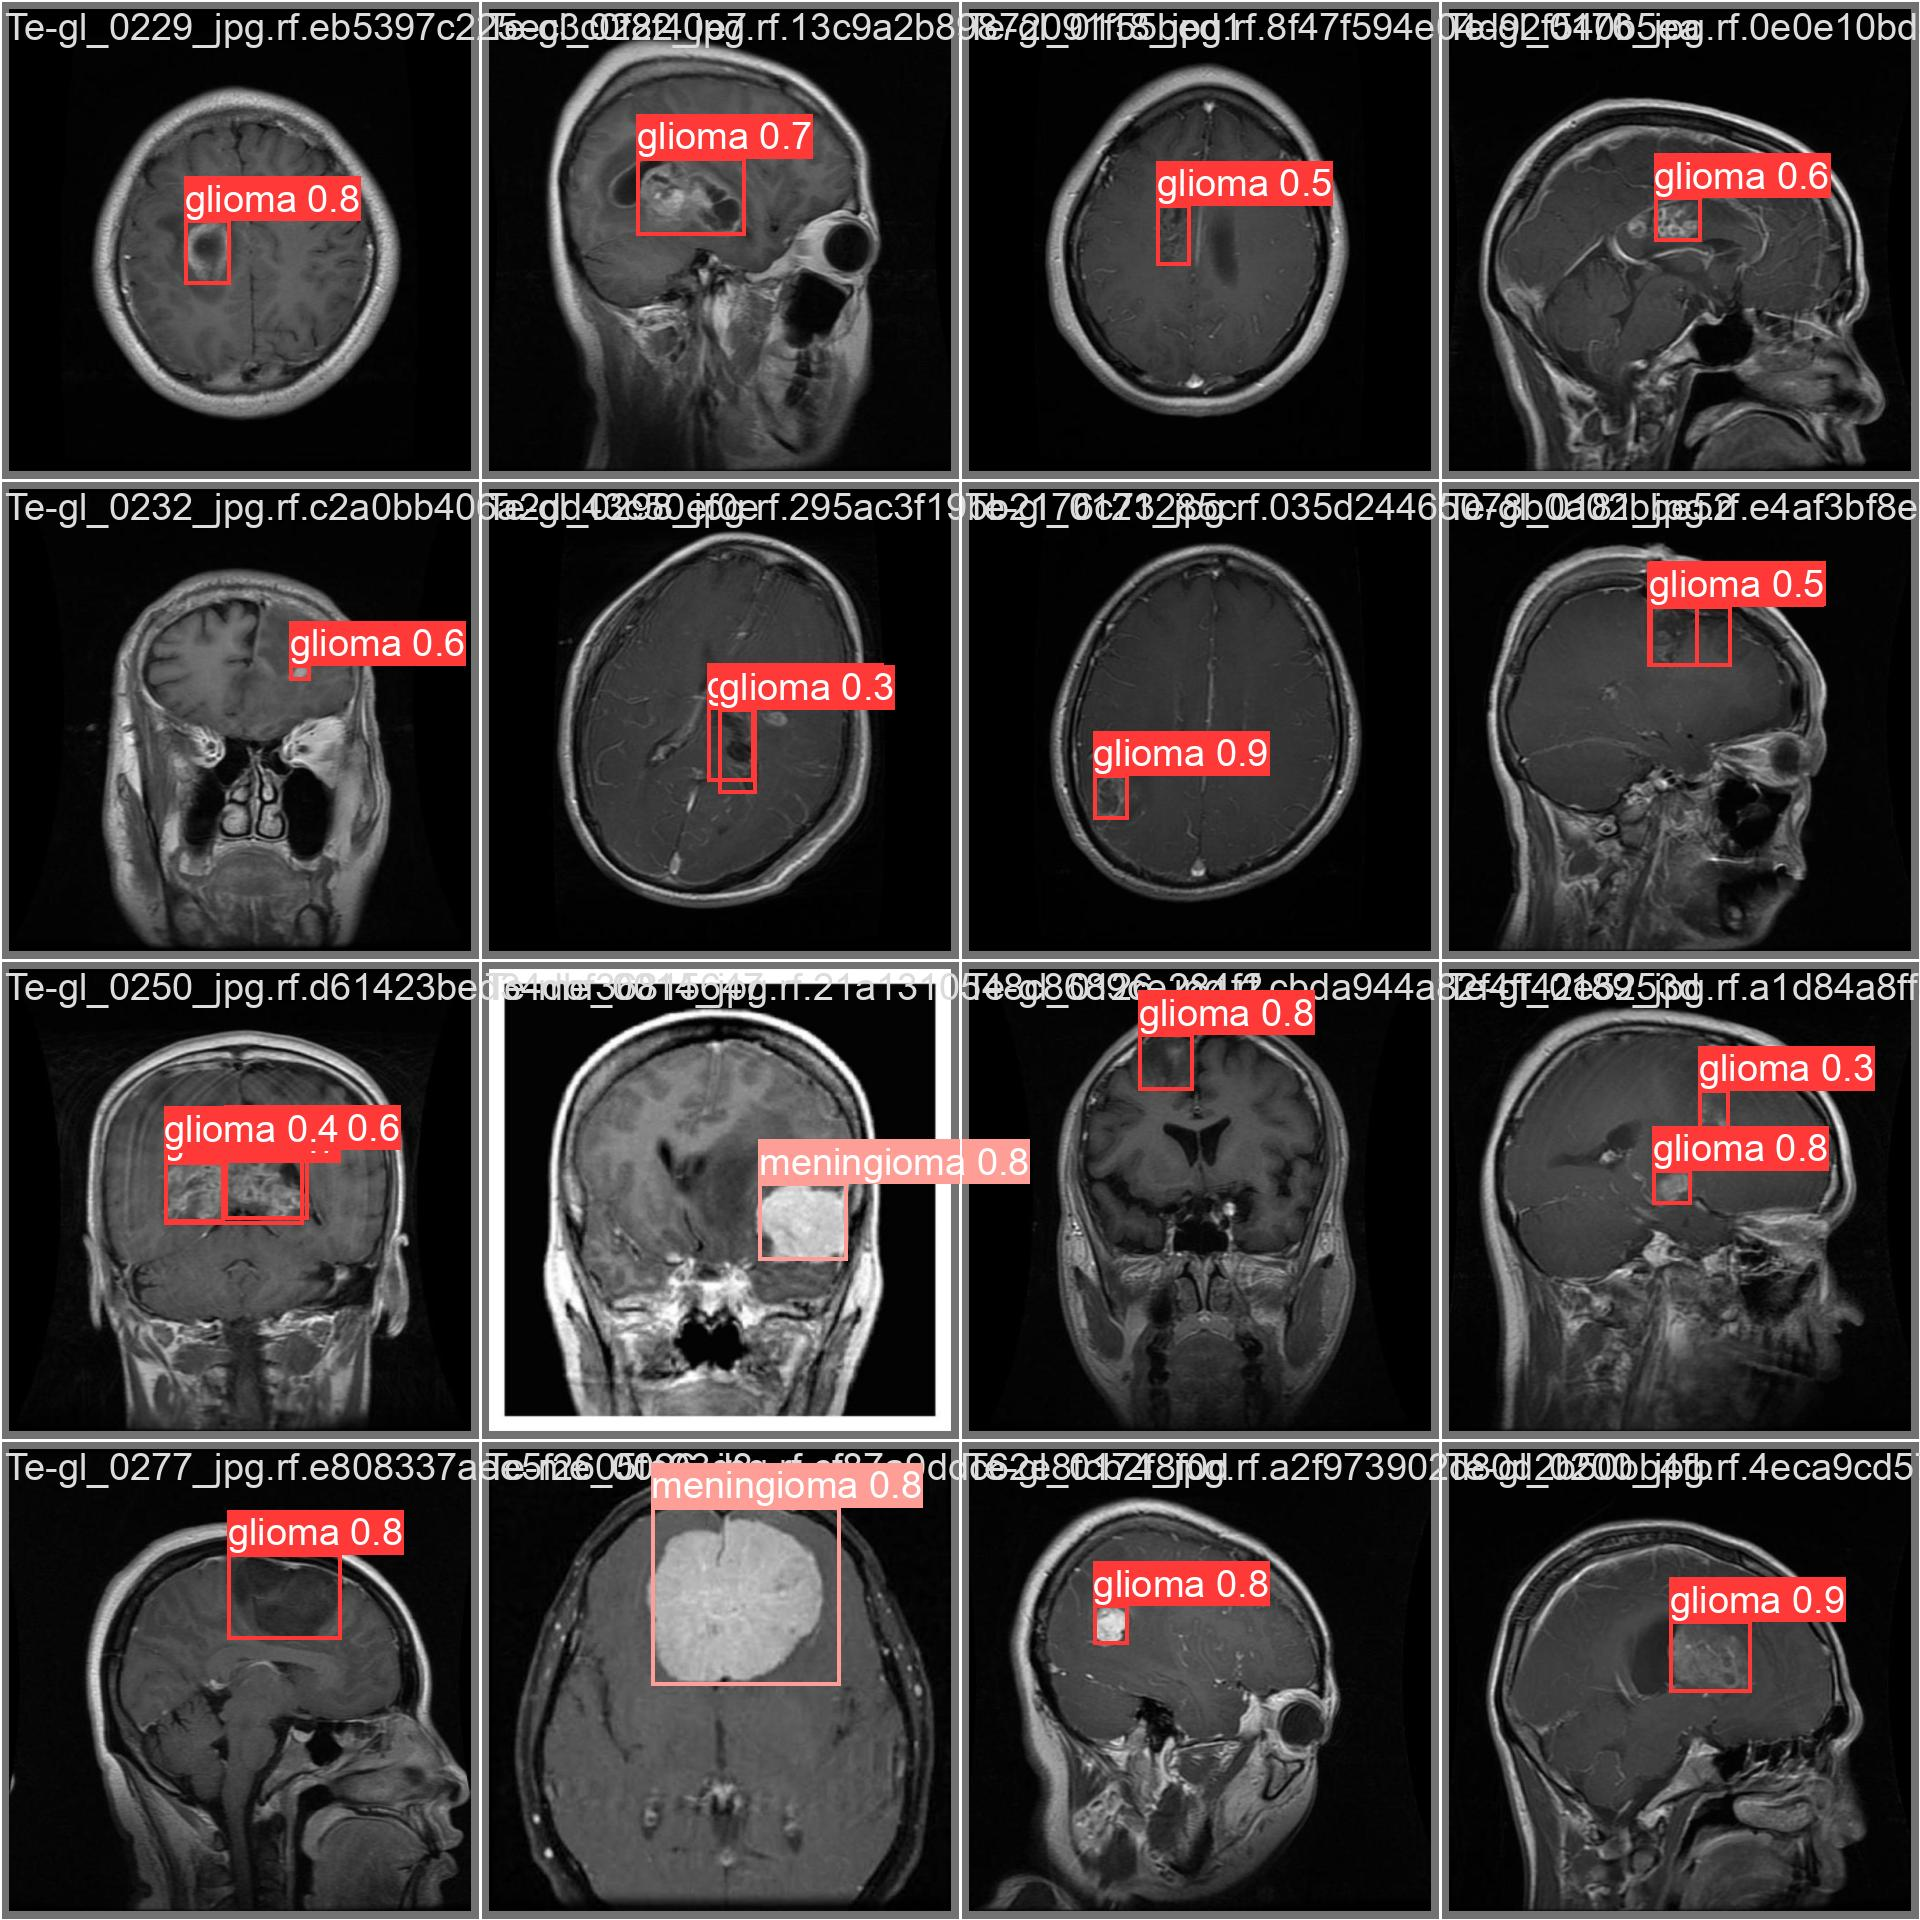

/n


In [ ]:
import glob
from IPython.display import Image, display
i=0
for imageName in glob.glob('/content/runs/detect/val/*.jpg'):
  i+=1
  if i<=50:
    display(Image(filename=imageName))
    print("/n")

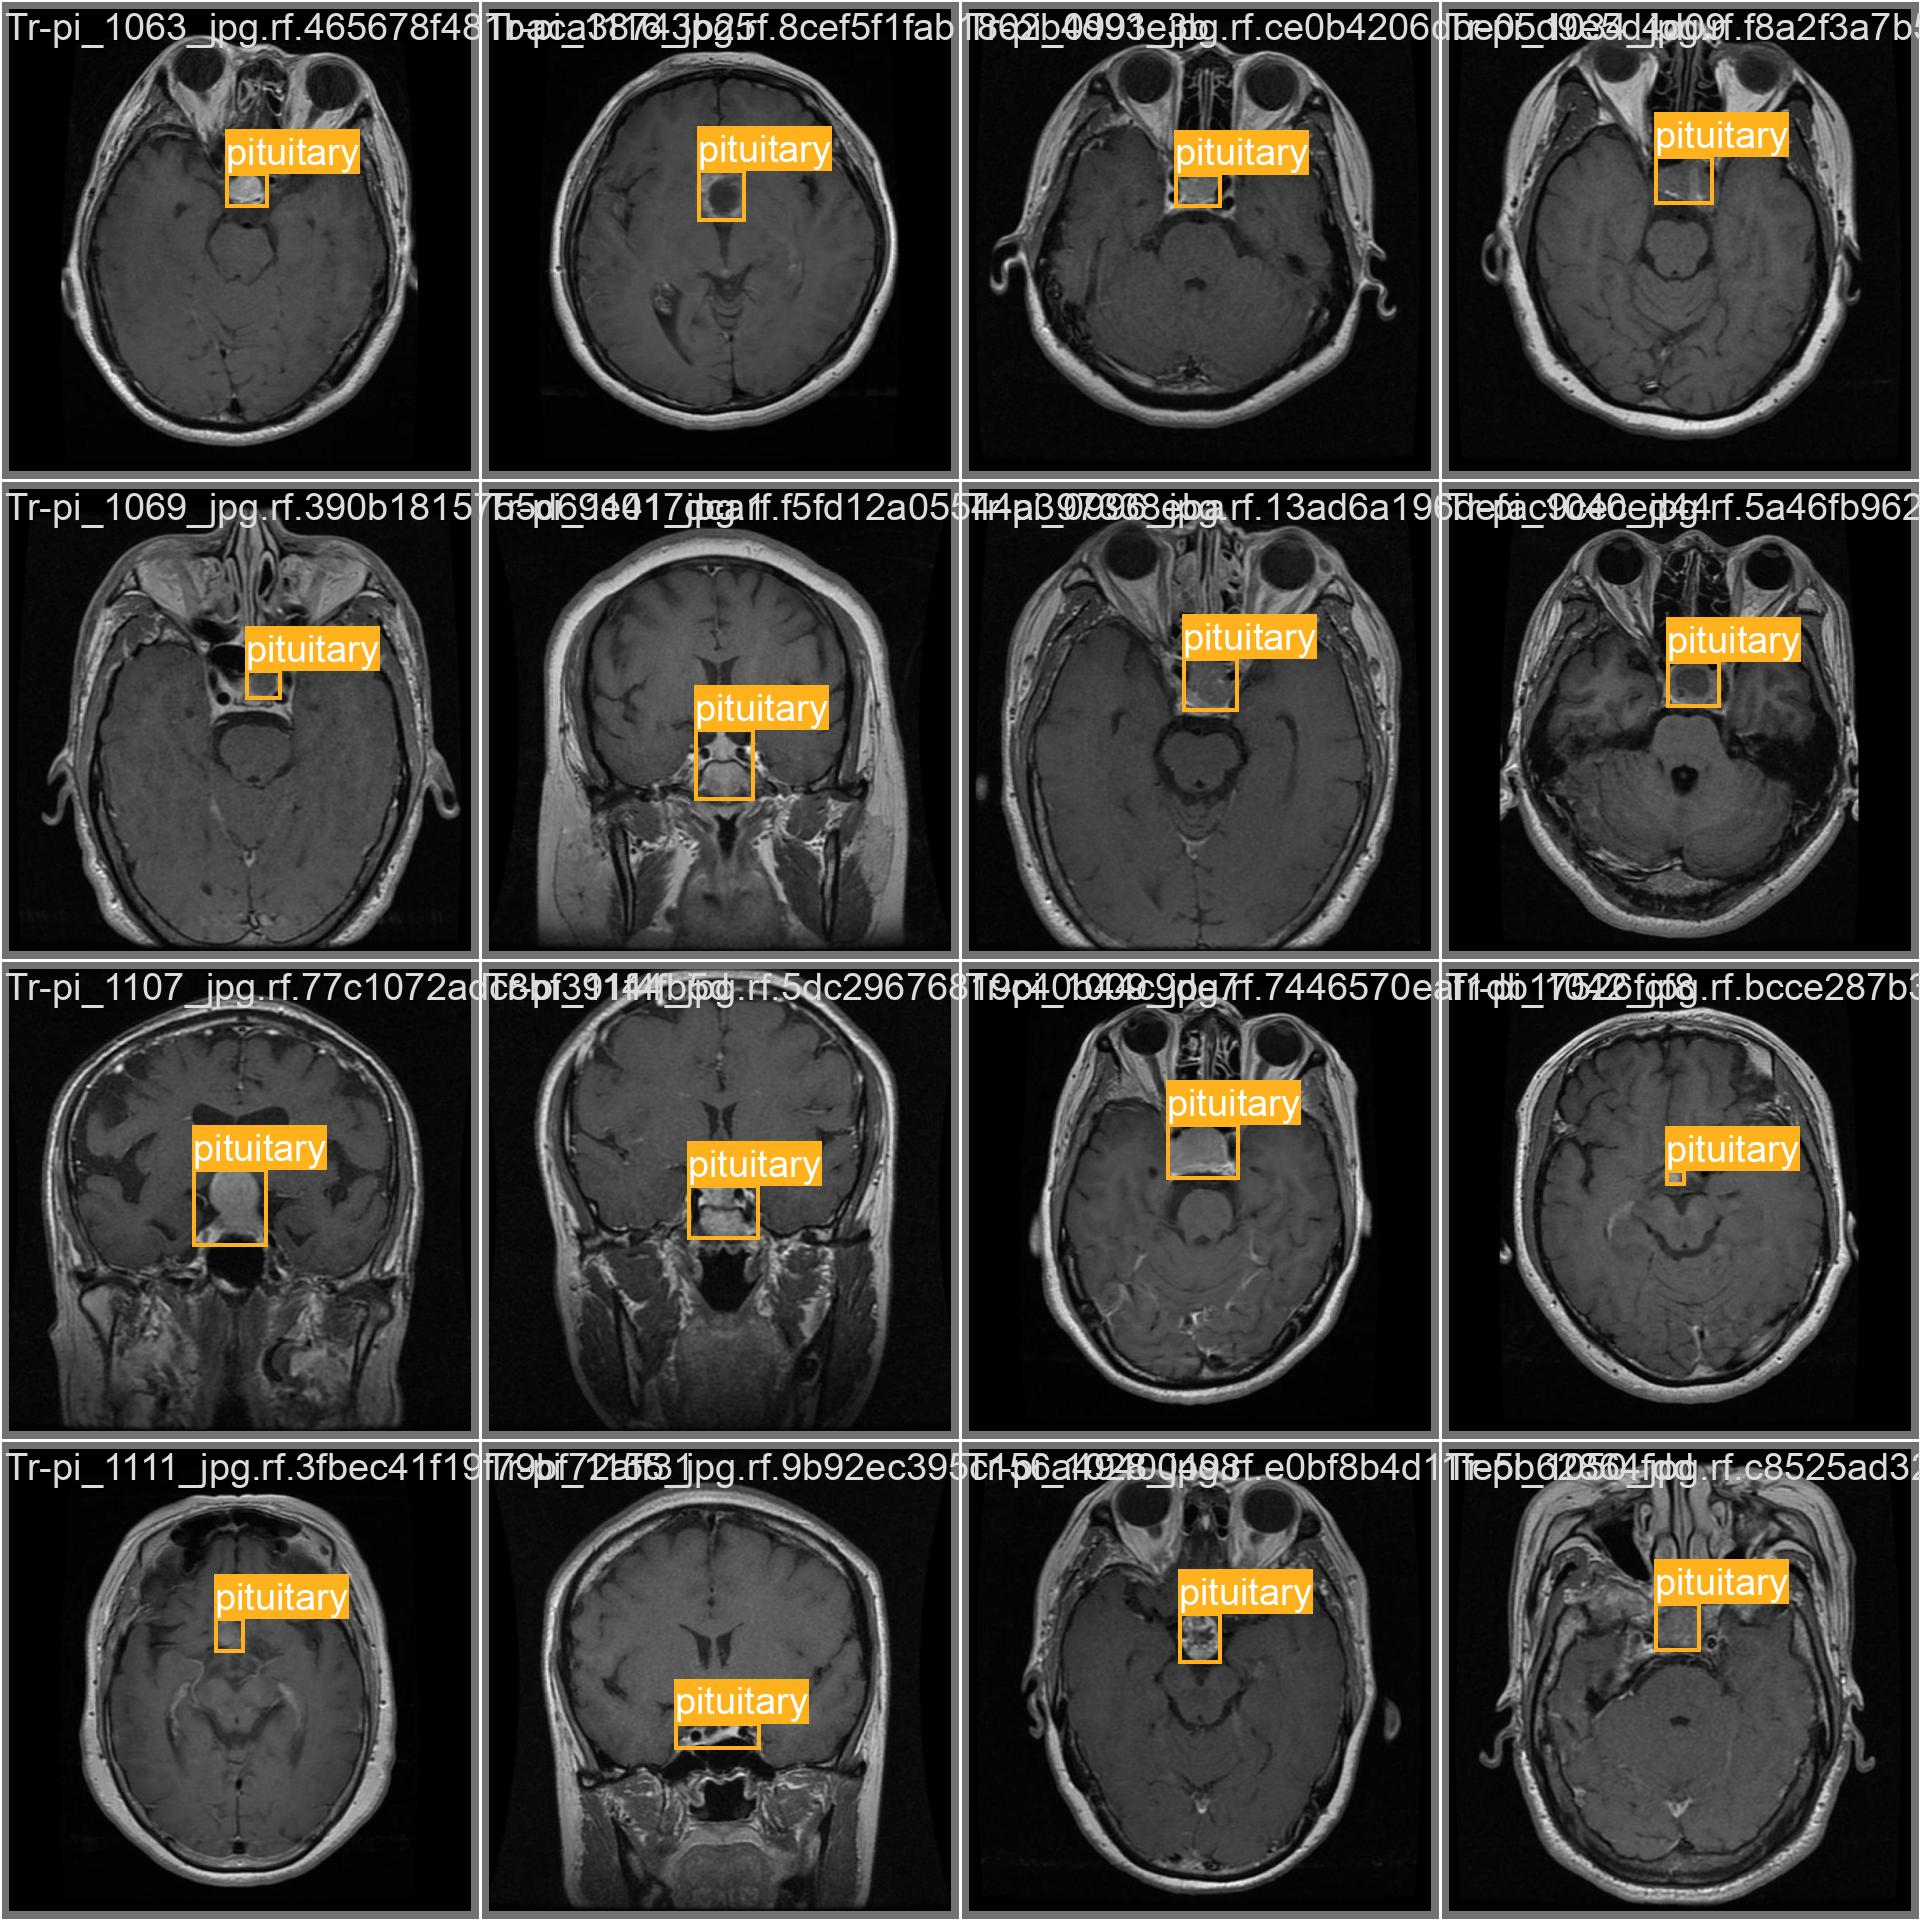

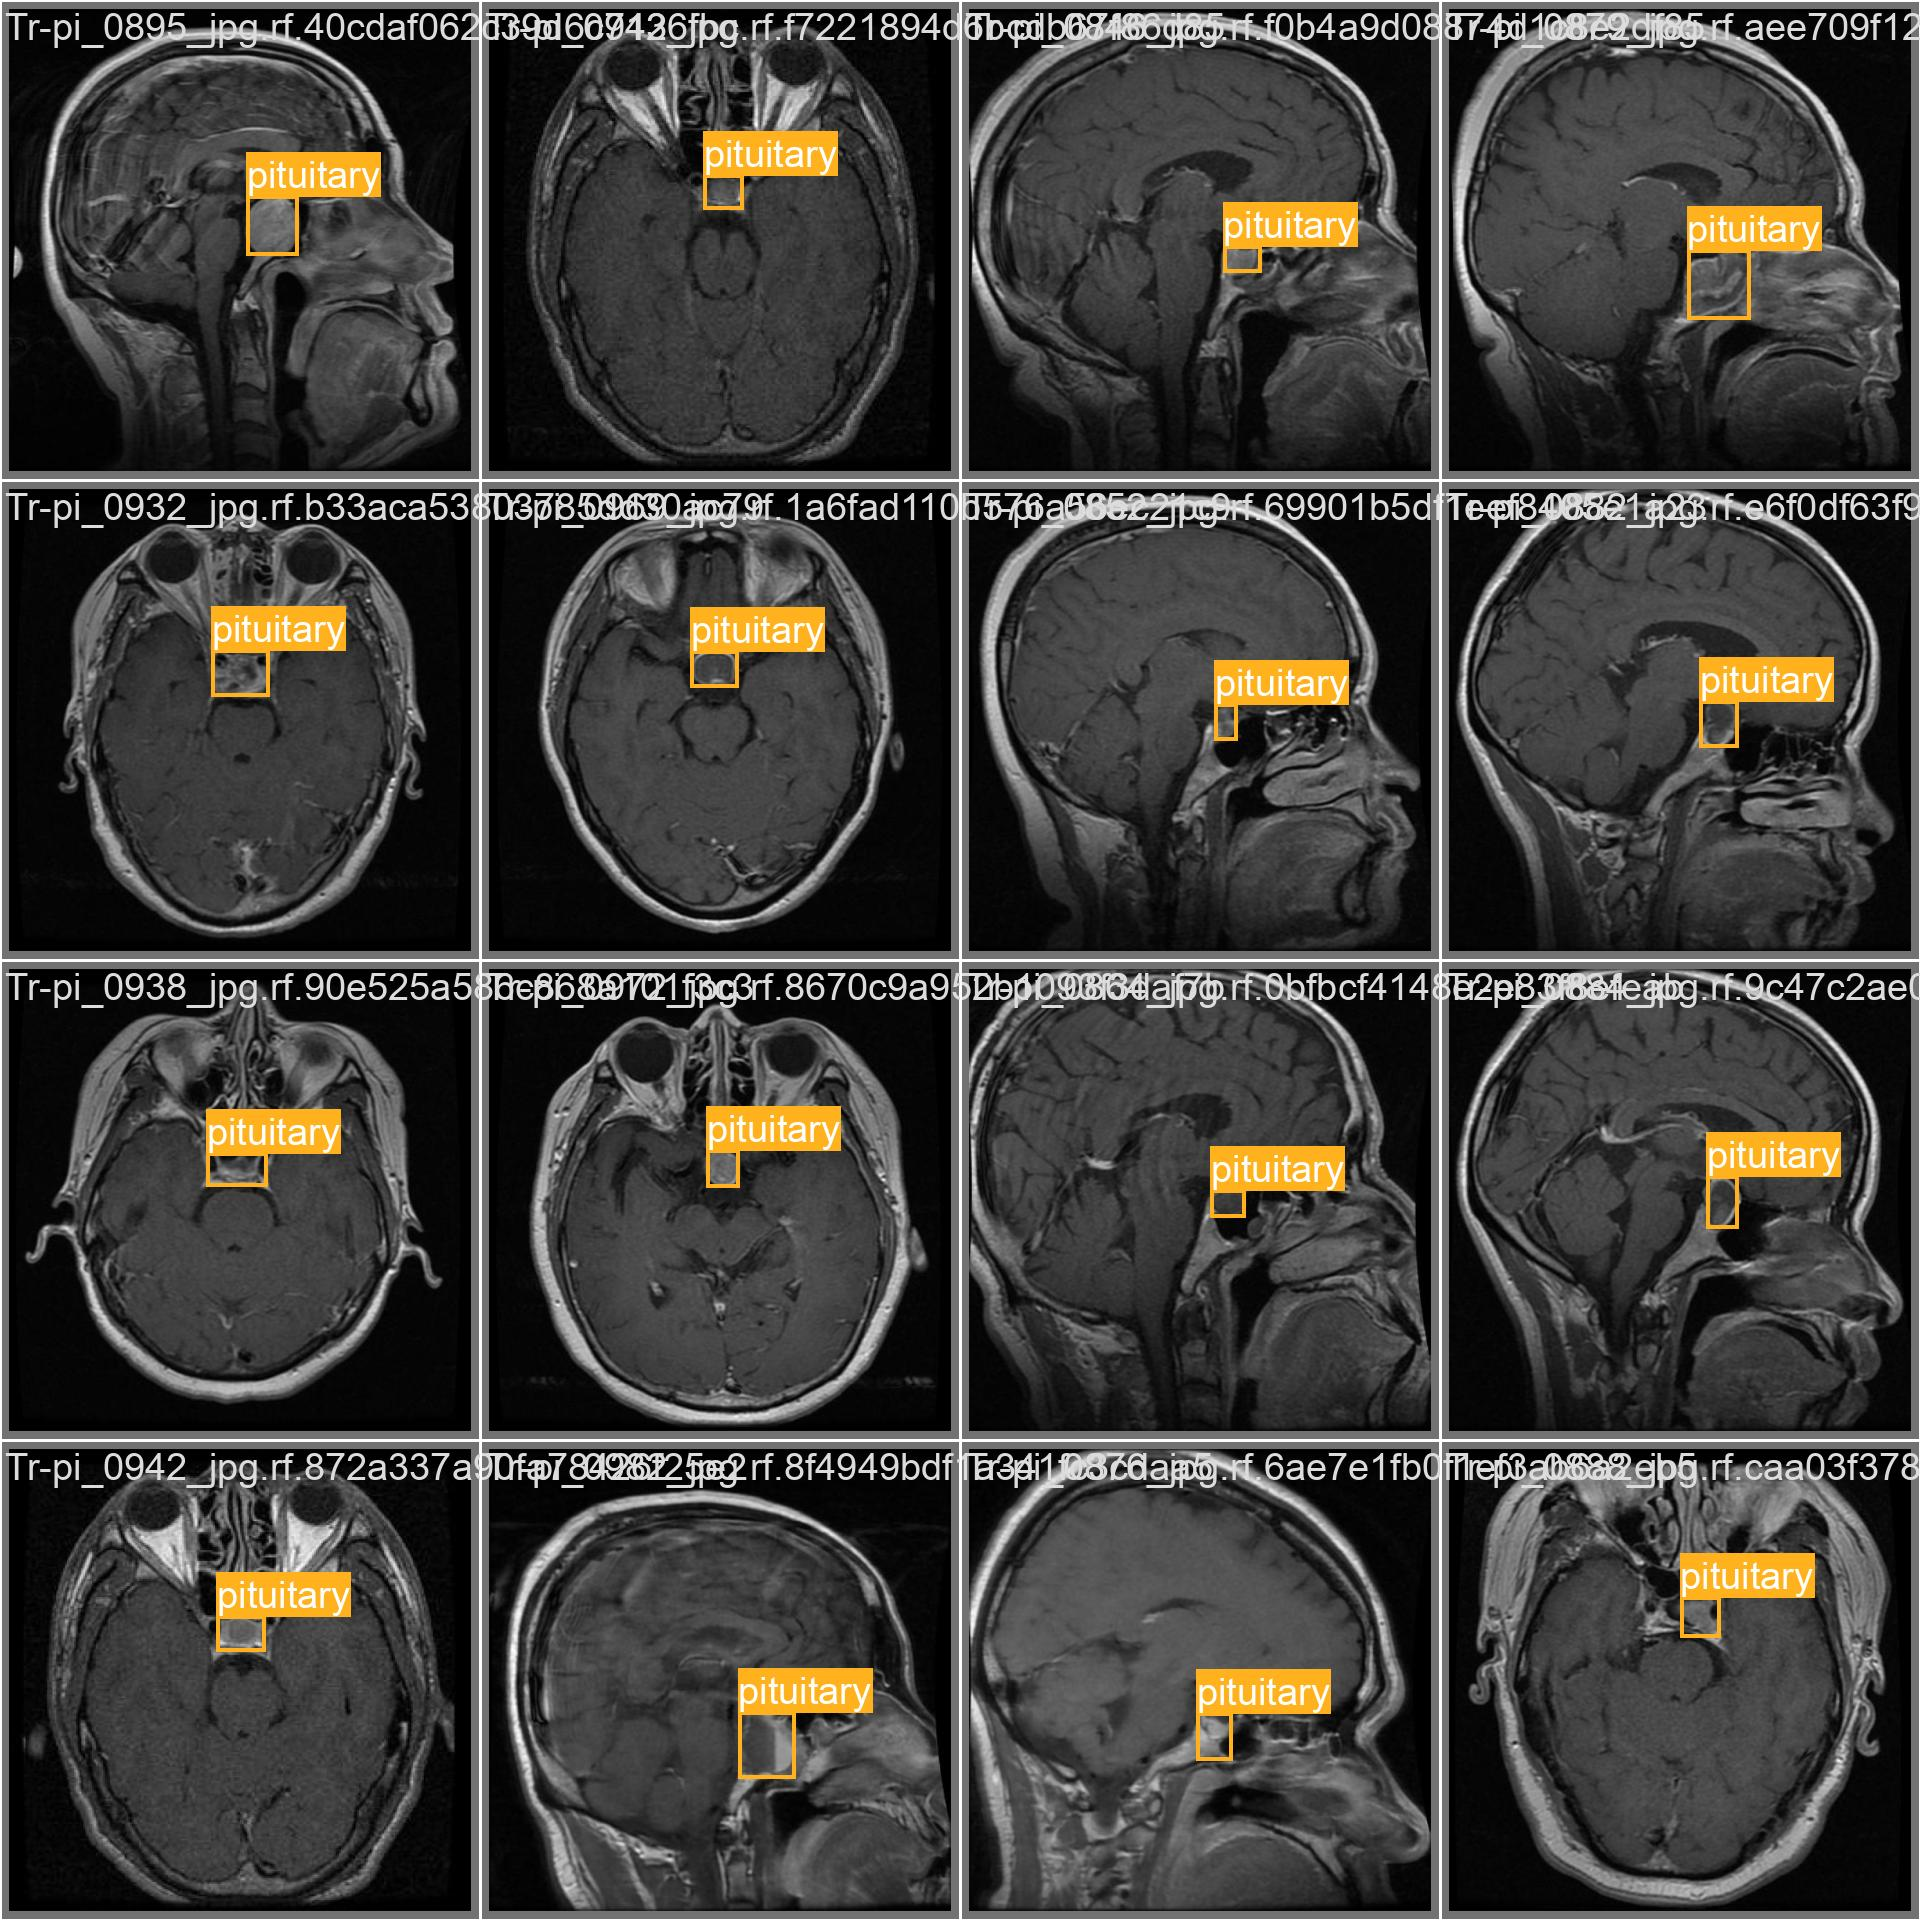

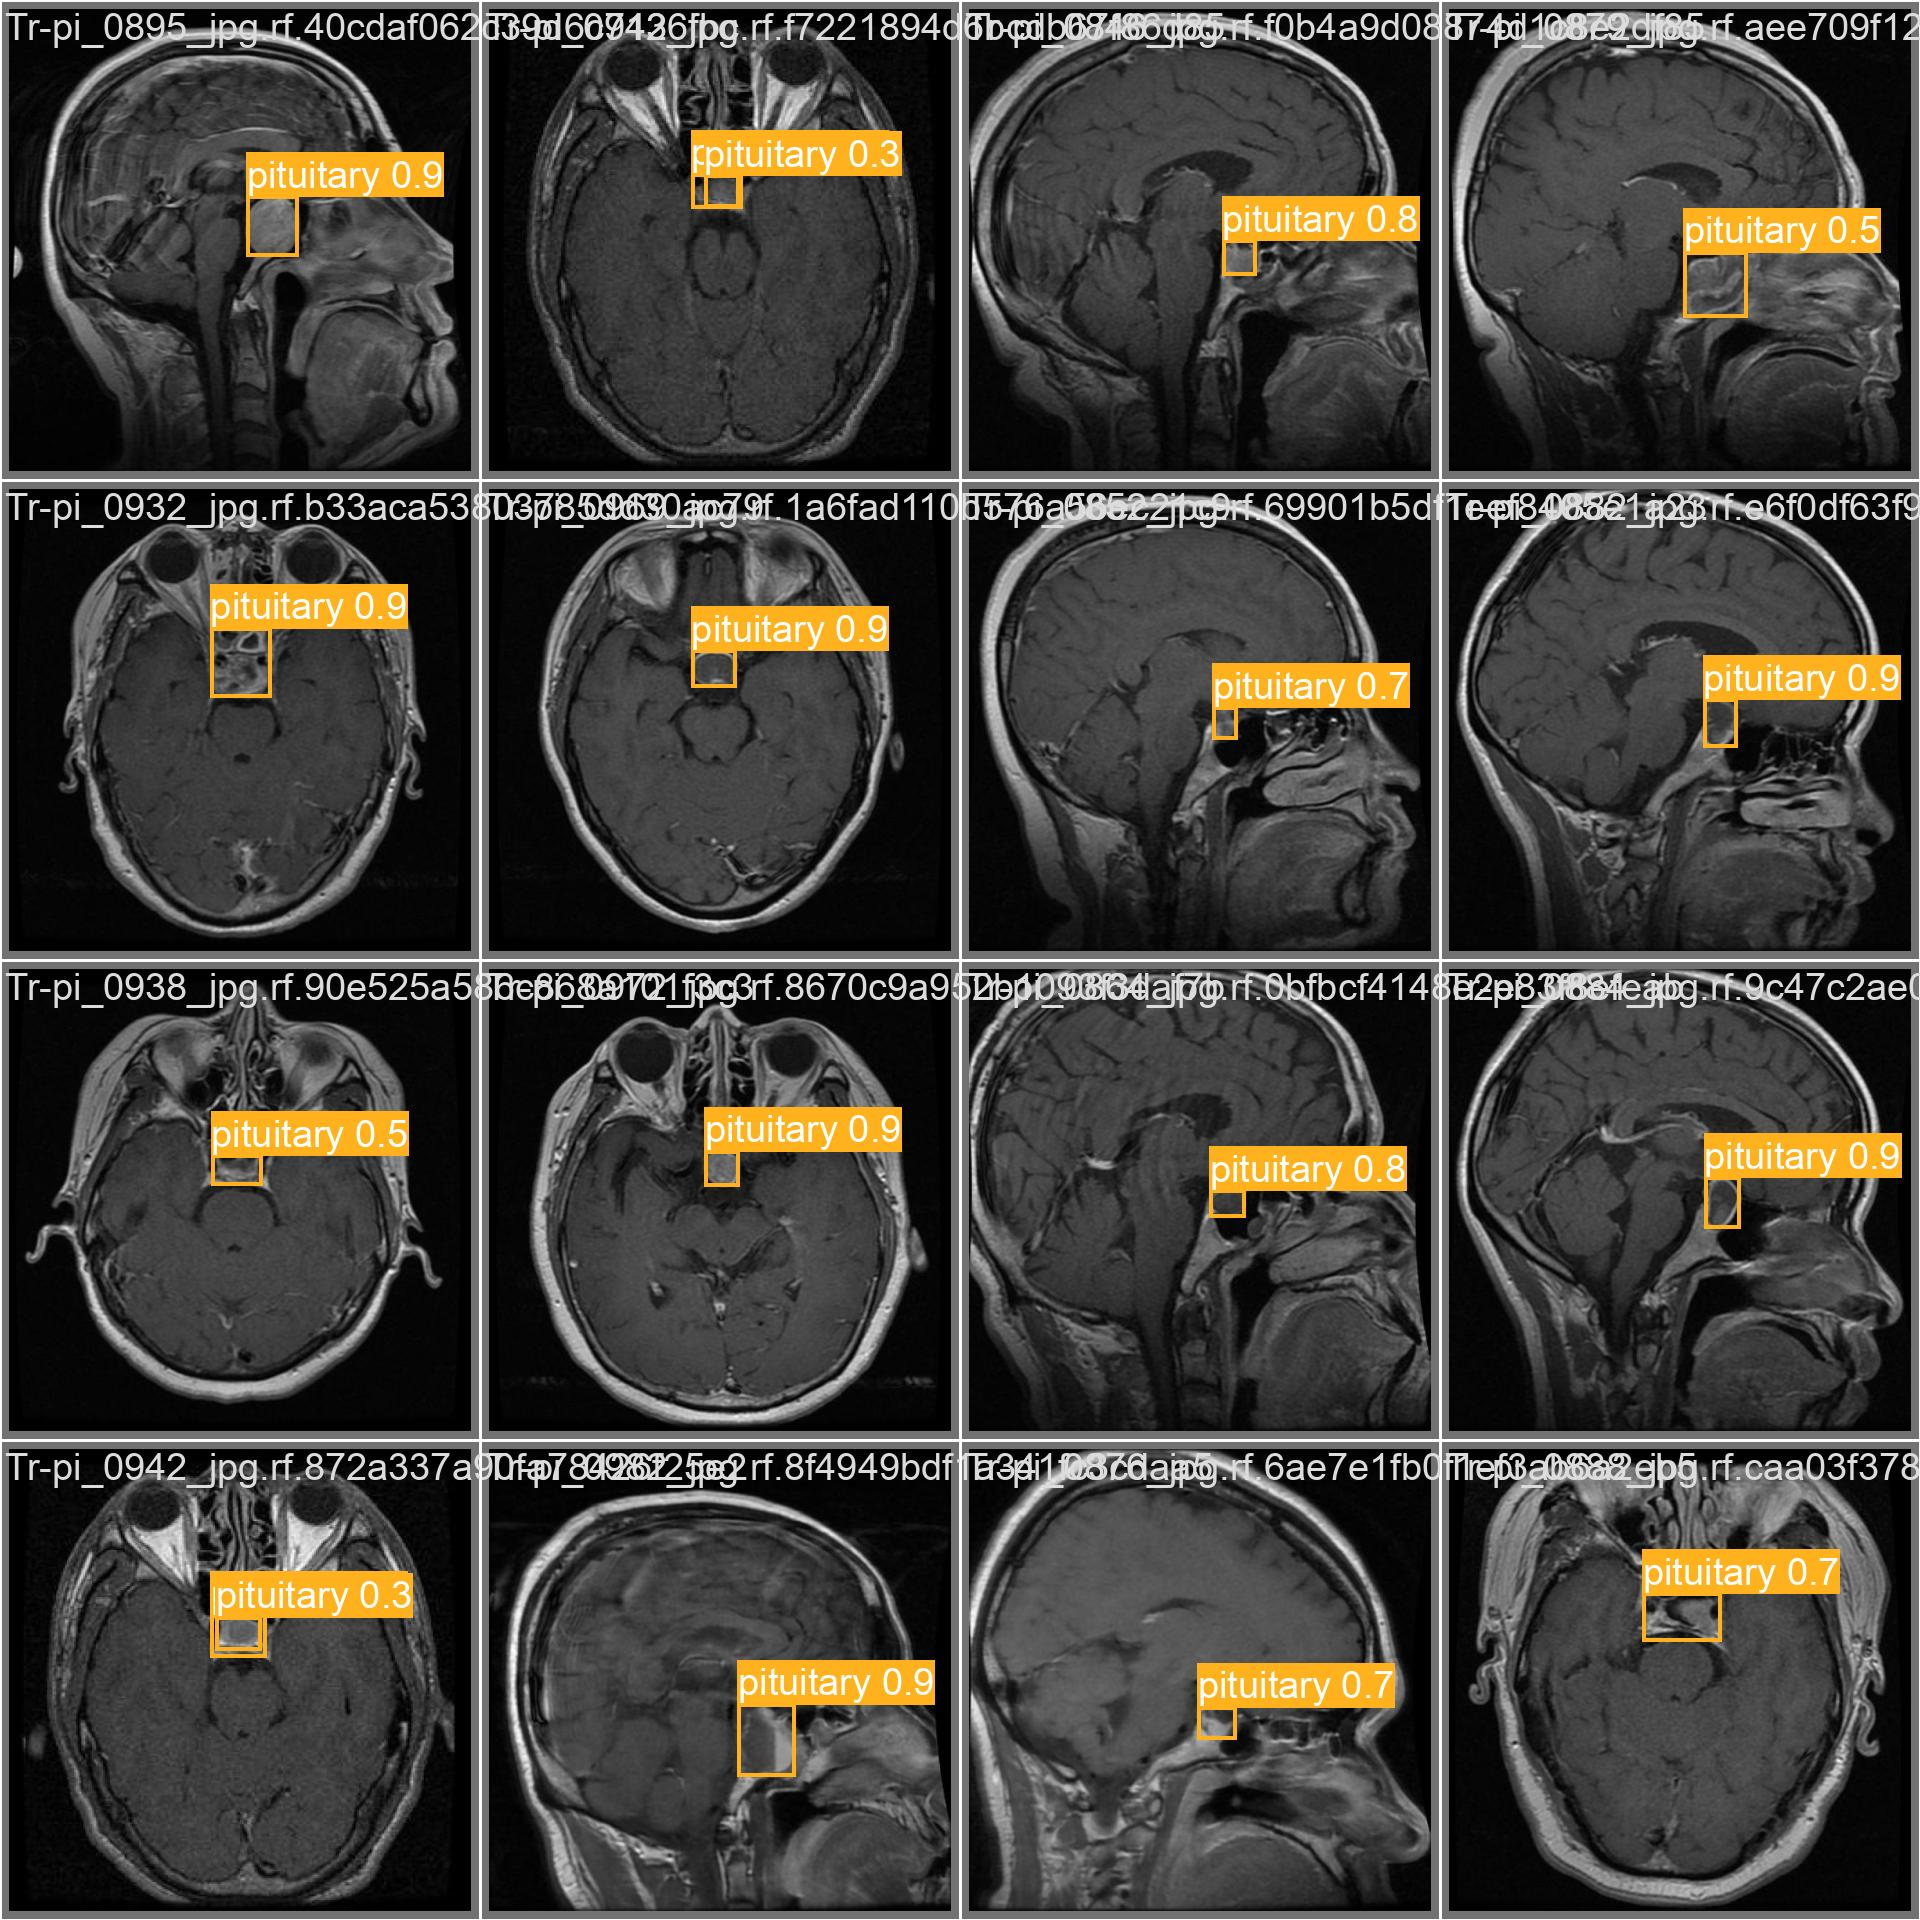

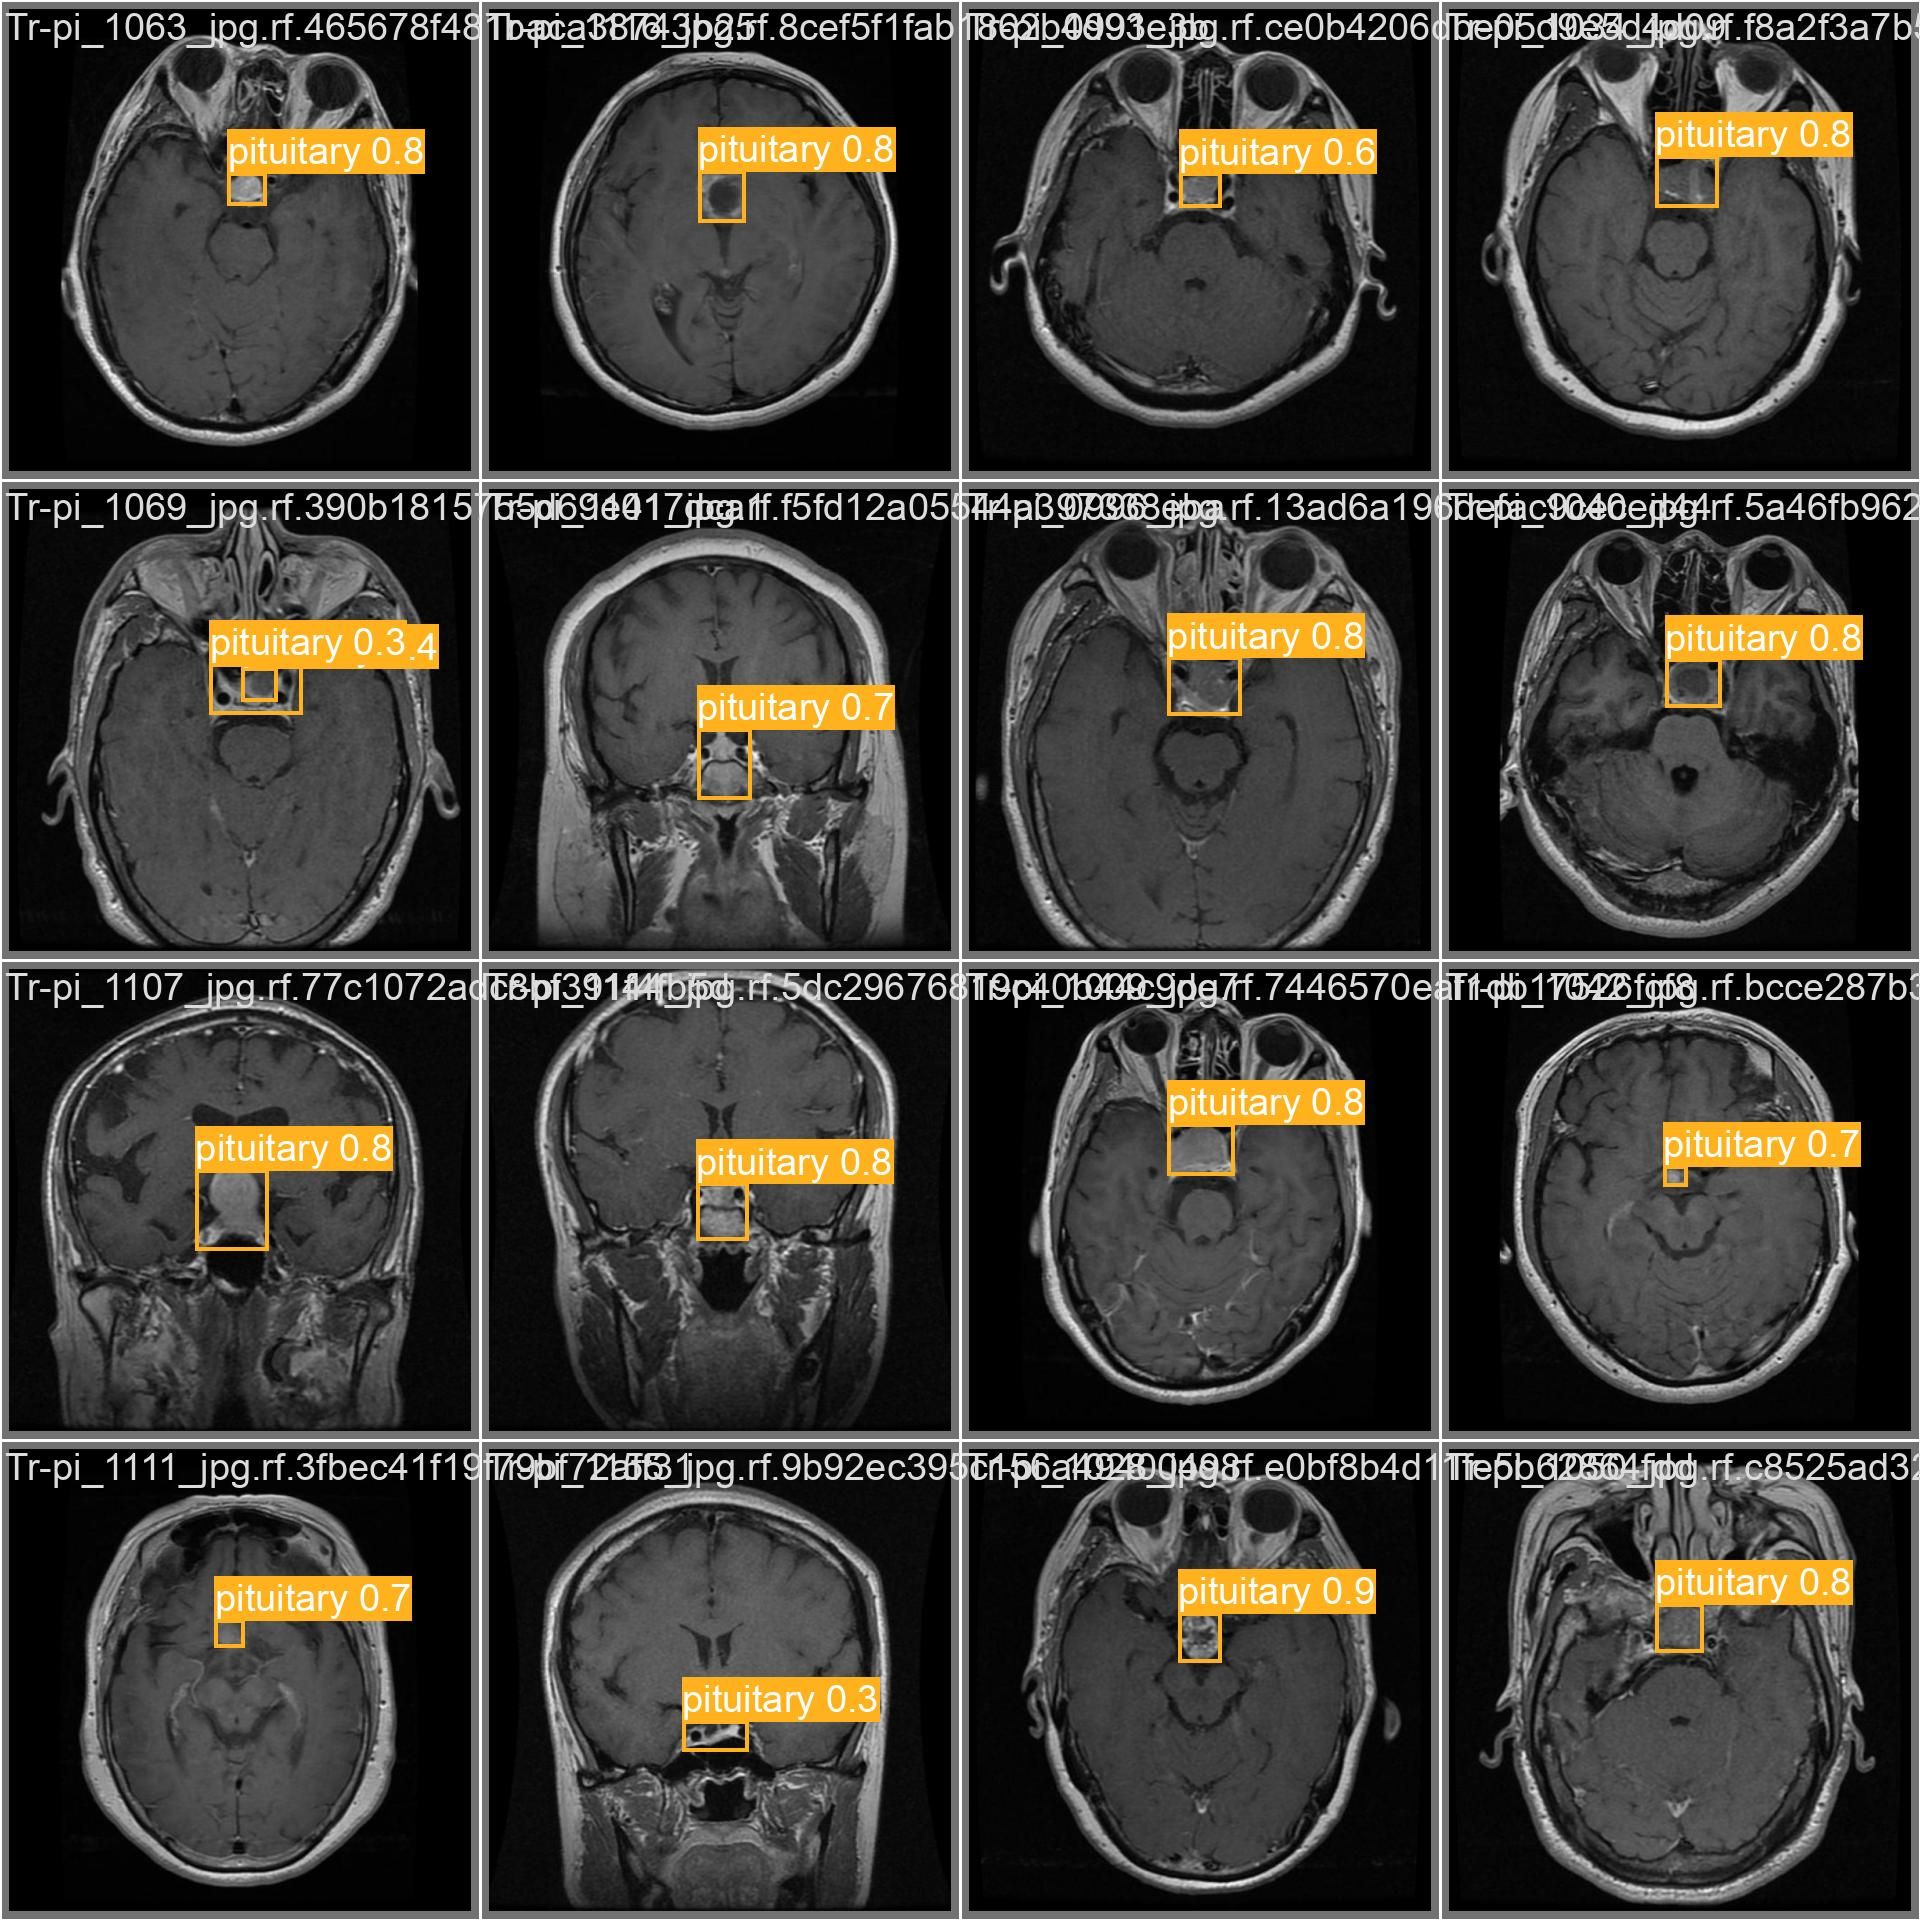

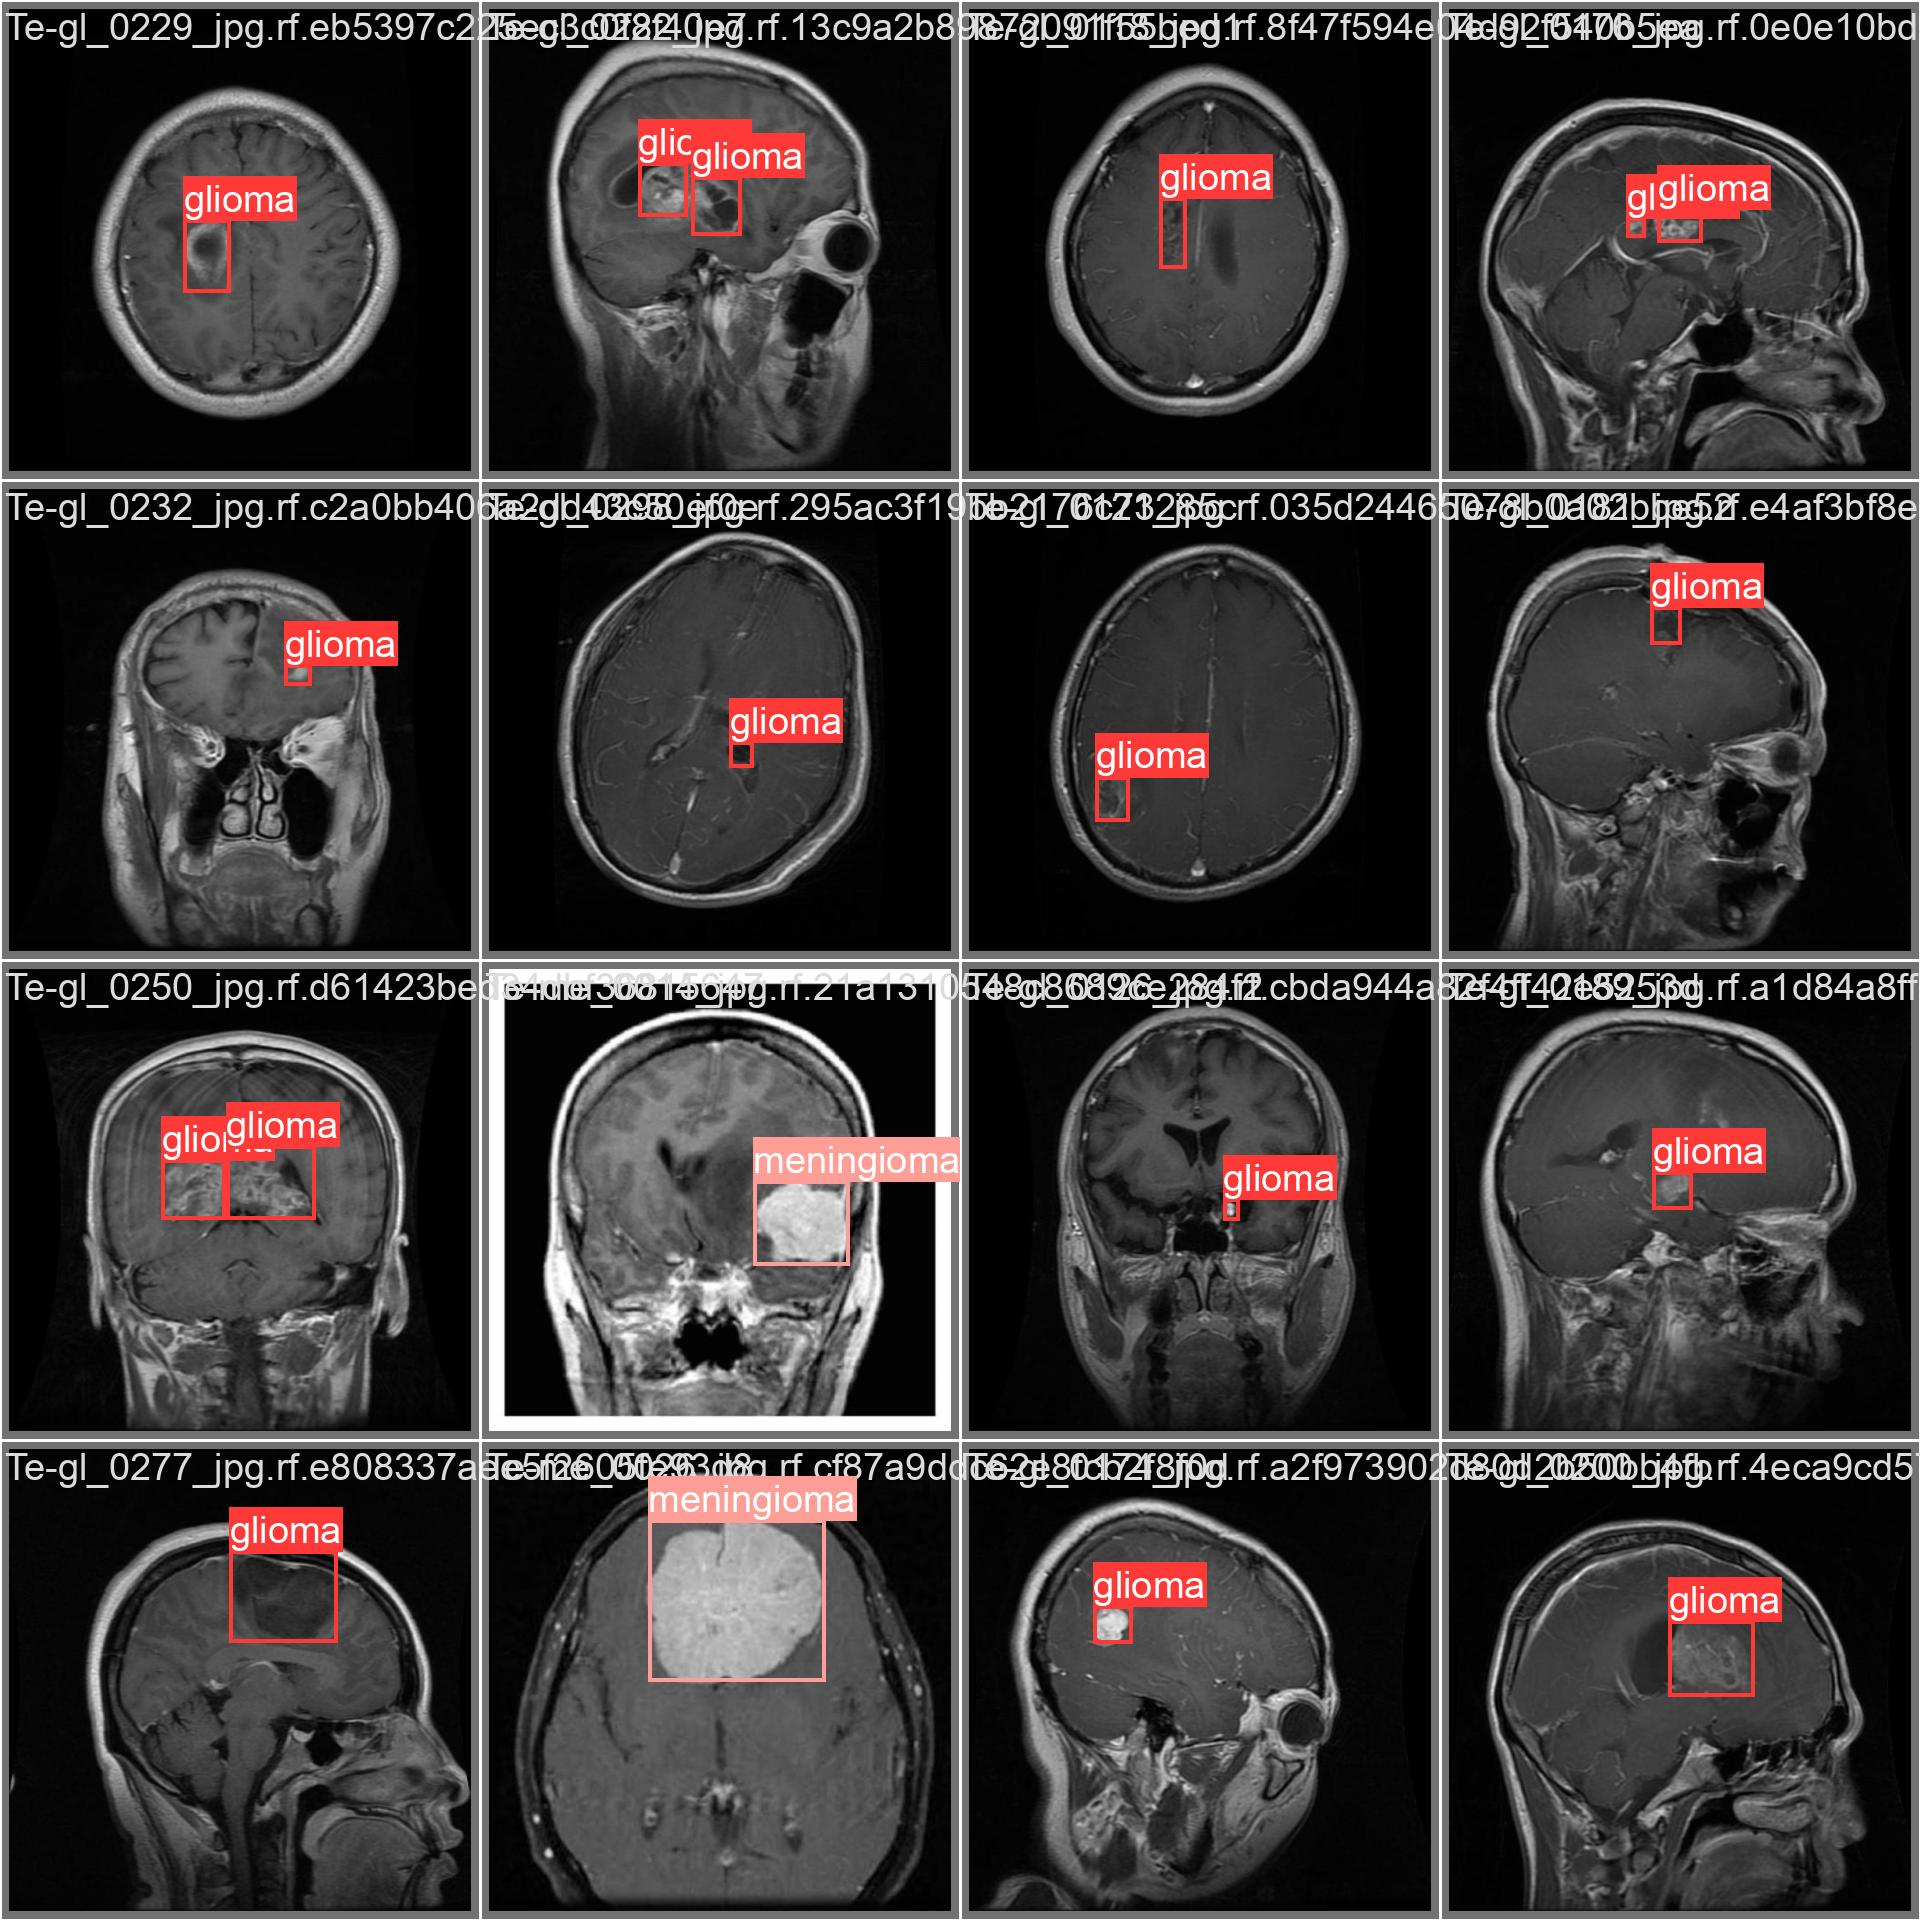

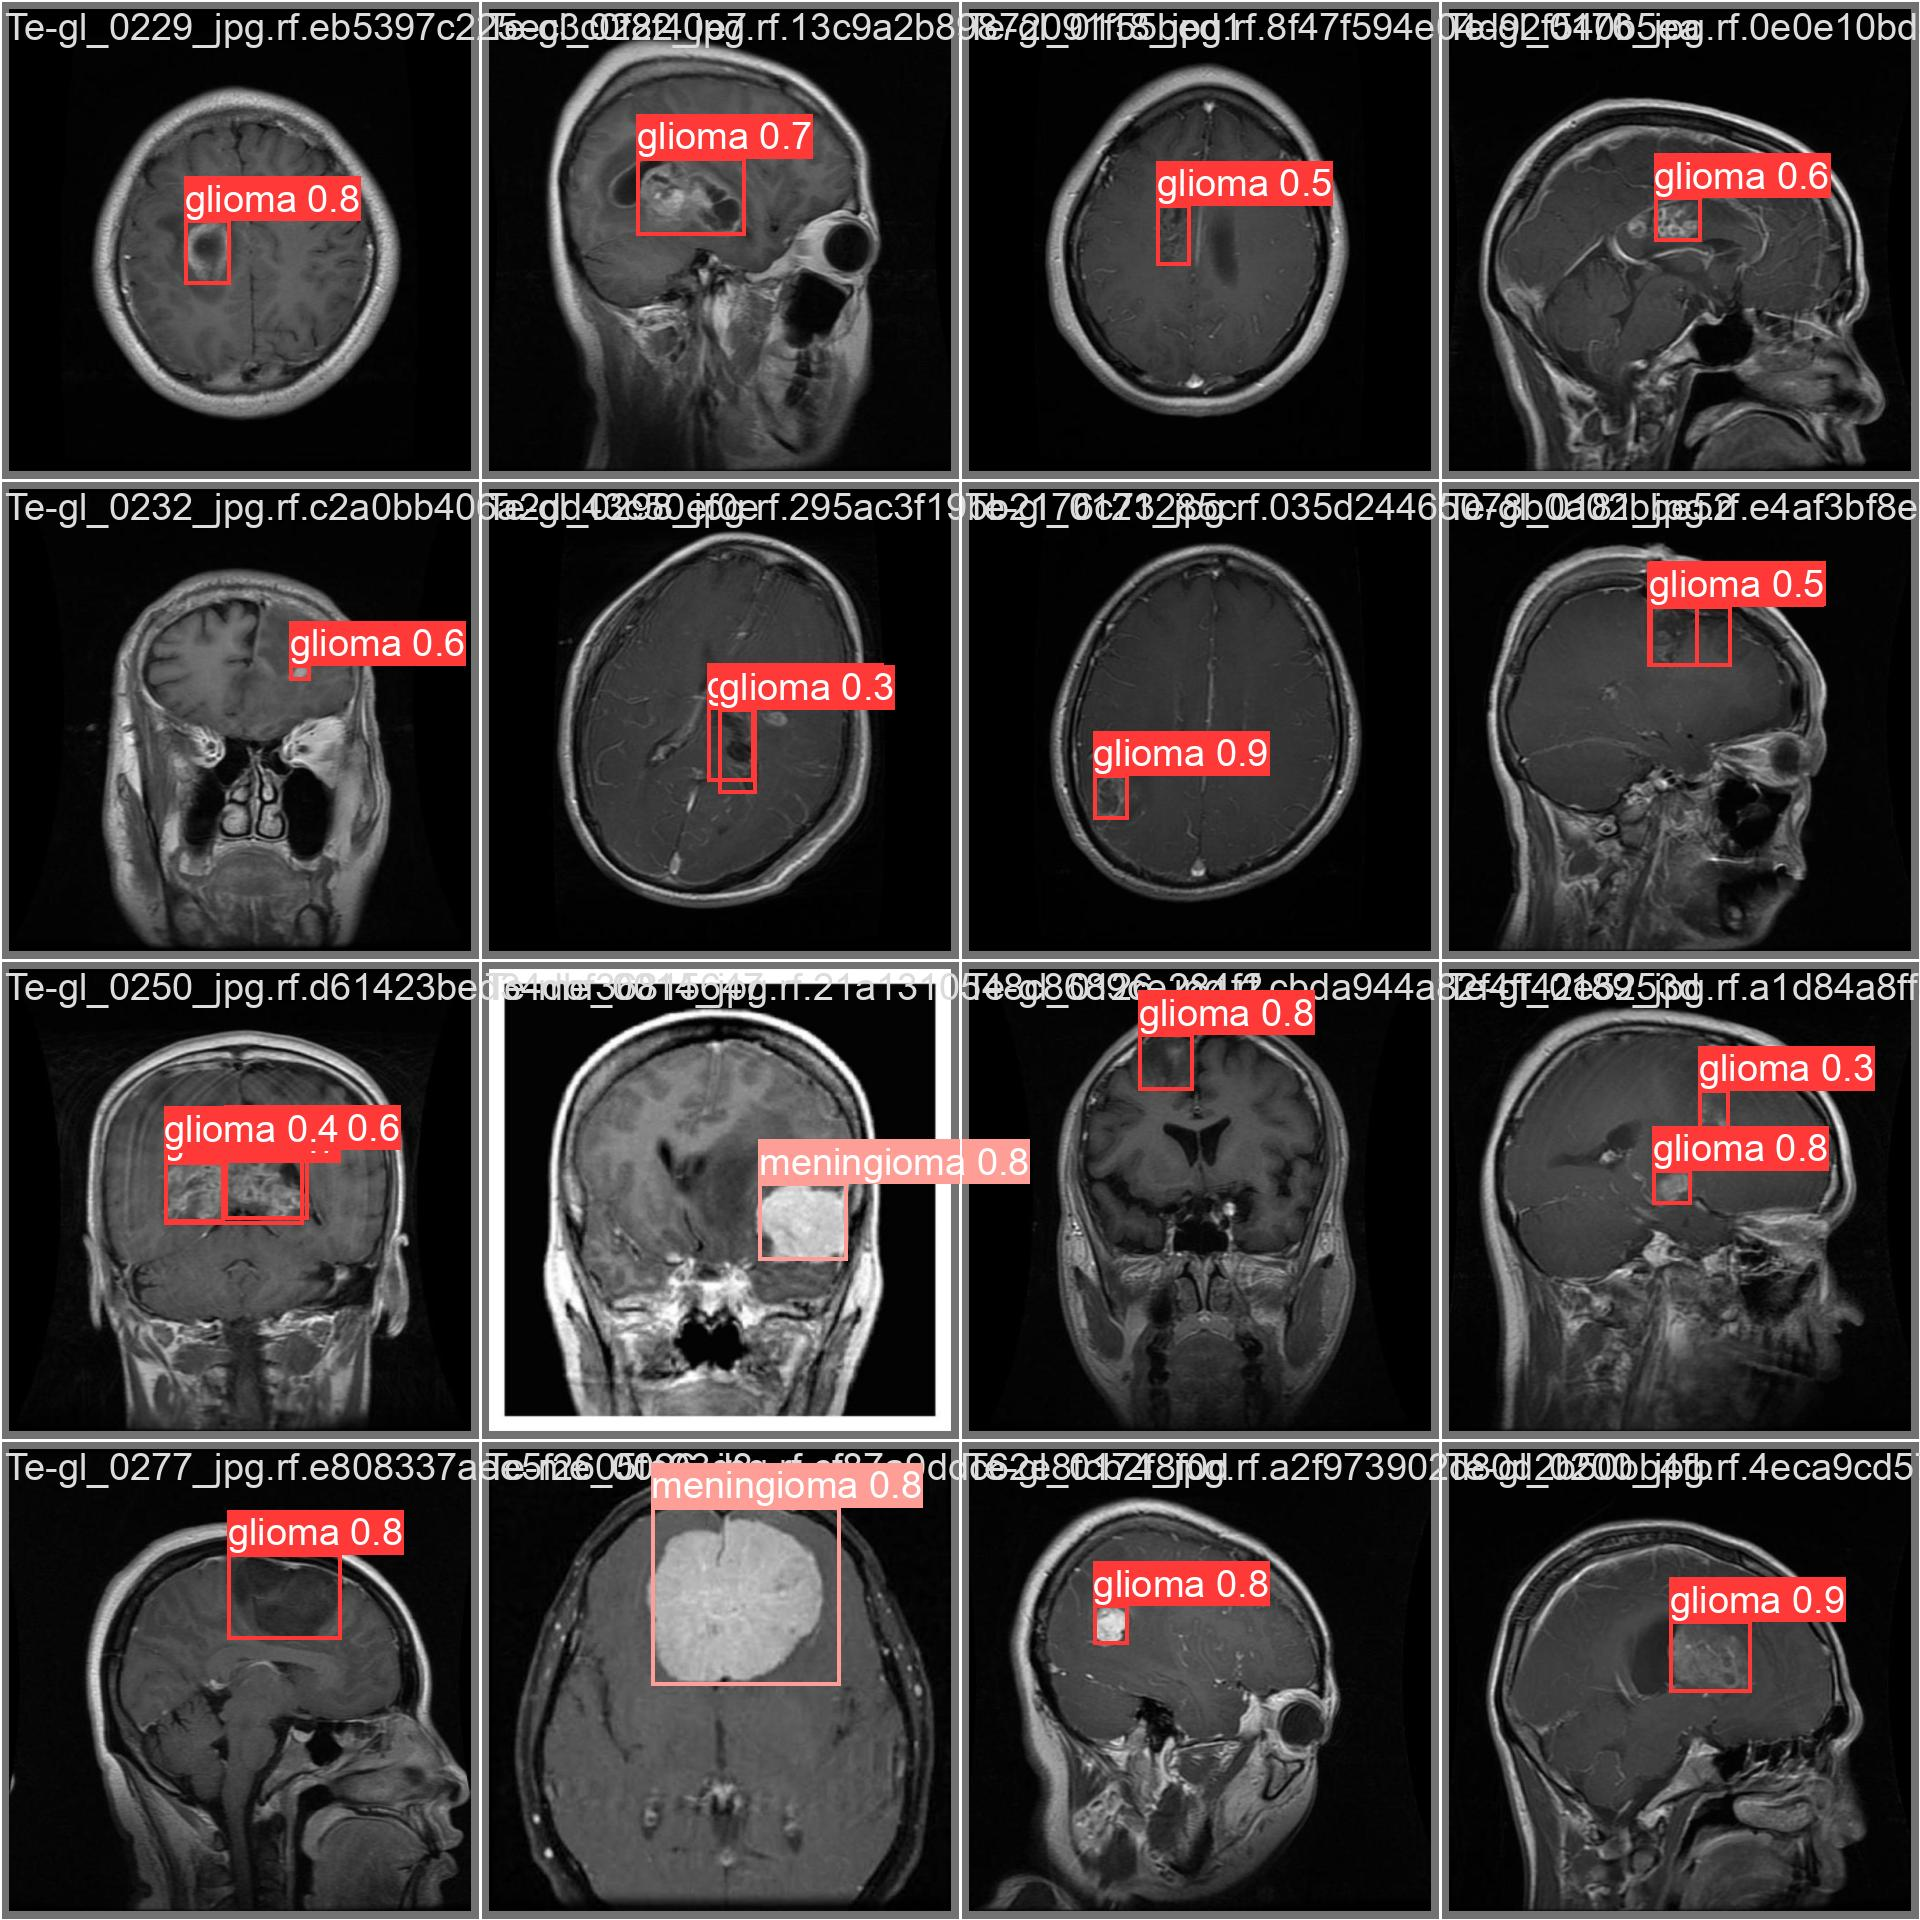

Accuracy: 0.75


In [ ]:
import glob
from IPython.display import Image, display

# Define variables to store validation results
true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0

# Iterate over the images
i = 0
for imageName in glob.glob('/content/runs/detect/val/*.jpg'):
    i += 1
    if i <= 50:
        # Display the image
        display(Image(filename=imageName))

        # Assume you have the validation results for each image
        # For demonstration purposes, let's assume they are hardcoded
        # Replace these lines with your actual validation logic
        TP = 1  # True positives
        TN = 2  # True negatives
        FP = 0  # False positives
        FN = 1  # False negatives

        # Update validation result variables
        true_positives += TP
        true_negatives += TN
        false_positives += FP
        false_negatives += FN

# Calculate accuracy
total_predictions = true_positives + true_negatives + false_positives + false_negatives
accuracy = (true_positives + true_negatives) / total_predictions

# Print accuracy
print("Accuracy:", accuracy)


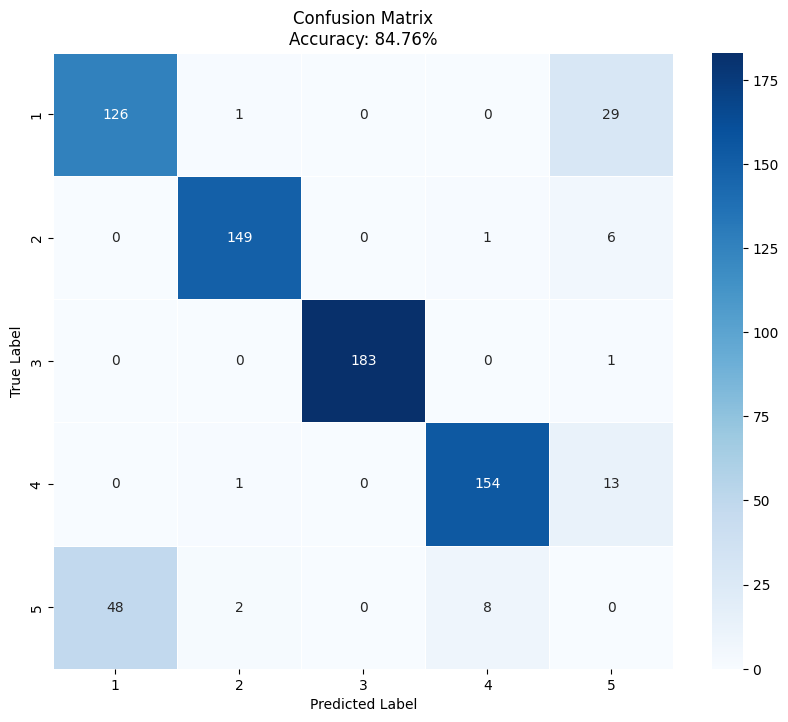

84.7645429362881


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace this with your actual confusion matrix)
conf_matrix = np.array([[126, 1, 0, 0, 29],
                        [0, 149, 0, 1, 6],
                        [0, 0, 183, 0, 1],
                        [0, 1, 0, 154, 13],
                        [48, 2, 0, 8, 0]])

# Calculate accuracy percentage
total_samples = np.sum(conf_matrix)
correct_predictions = np.trace(conf_matrix)
accuracy_percentage = (correct_predictions / total_samples) * 100

# Convert confusion matrix to DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=range(1, 6), columns=range(1, 6))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, cmap="Blues", fmt='d', linewidths=.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_percentage:.2f}%')
plt.show()
print(accuracy_percentage)


In [ ]:
# Calculate precision and recall for each class
precision = np.zeros(conf_matrix.shape[0])
recall = np.zeros(conf_matrix.shape[0])

for i in range(conf_matrix.shape[0]):
    true_positives = conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives
    precision[i] = true_positives / (true_positives + false_positives)
    recall[i] = true_positives / (true_positives + false_negatives)

# Convert precision and recall to DataFrame for better visualization
metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall}, index=range(1, 6))

# Display precision and recall for each class
print("Precision and Recall for each class:")
print(metrics_df)# Calculate precision and recall for each class


Precision and Recall for each class:
   Precision    Recall
1   0.724138  0.807692
2   0.973856  0.955128
3   1.000000  0.994565
4   0.944785  0.916667
5   0.000000  0.000000
